# U.S. Presidents State of the Union Addresses (1945 - 2019)

The State of the Union Address (sometimes abbreviated to SOTU) is an annual message delivered by the President of the United States to a joint session of the United States Congress at the beginning of each calendar year in office. The message typically includes a budget message and an economic report of the nation, and also allows the President to propose a legislative agenda and national priorities.

In this project we have collected State of the Union Addresses from last seventy five years delivered by thirteen of the United States Presidents and which includes the following. 

   1. President Harry Truman (R) State of the Union 1945-1951
   2. President Dwight D. Eisenhower (R) State of the Union 1953-1960
   3. President John F Kennedy (D) State of the Union 1961-1963
   4. President Lyndon B. Johnson (D) State of the Union 1963-1969.
   5. President Richard Nixon (R) State of the Union 1970-1974
   6. President Gerald Ford (R) State of the Union 1975-1977
   7. President Jimmy Carter (D) State of the Union 1978-1980
   8. President Ronald Regan (R) State of the Union 1981-1988
   9. President George H. W. Bush (R) State of the Union 1989-1992
   10. President Bill Clinton (D) State of the Union 1993-2000
   11. President George W Bush (R) State of the Union 2001-2008
   12. President Barrack Obama (D) State of the Union 2009-2016
   13. President Donald trump (R) State of the Union 2018, 2019

    
With five Presidents from Democratic and eight from the Republican party all texts have been divided in to two corpuses Democratic and Republican. The following approaches have been used to distinguish and analyze speeches delivered by Presidents from both the Democratic and Republican Parties.

   

### Approaches used:
   1. Bag of Words Approach: To compare most common words used for both the corpuses.
   2. Principle Component Analysis (PCA): To reduce number of features and explain variance in the data.
   3. K-Means Clustering : To identify number of possible clusters existing in the data.
   4. Calculating Silhoute Coefficent: to gauge consistency of clusters across samples.
   5. Word Tokenization Approach: To identify word frequency distributions for both the corpuses.
   6. Tf-idf Approach: To calculate Term Frequency and Inverse Document Frequencies for words and sentences. 
   7. Word2Vec Approach: To identify clusters and similarities among texts in both the corpuses.

### Topics covered:

- 1.0. Corpus Selection
- 1.1. Text Consolidation
- 1.2. Text Cleaning
- 1.3. Parsing through Spacy


- 2.0. Applying Bag of Words Approach
- 2.1. Setting up the (BOW)
- 2.2. Creating a DataFrame with (BOW) Features
- 2.3. Principle Component Analysis (PCA)
- 2.4. Explained Variance Ratio
- 2.5. Performing PCA with select number of components
- 2.6. K Means Clustering
- 2.7. K means Visualizations
- 2.8. K Means Elbow Method 


- 3.0. Splitting Data in to samples and check for consistency
- 3.1. Sample K Means visualizations 
- 3.2. Sample K Means Silhouette Scores 


- 4.0. Applying Word Tokenization Approach
- 4.1. Words Frequency Distribution


- 5.0. Applying Tf-idf Approach
- 5.1. Tf-idf scores for Sentences
- 5.2. Dimensionality Reduction 
- 5.3. Singular Value Decomposition (SVD)
- 5.4. Tf-idf Sentence Similarity scores 
- 5.5. K Means Clustering 
- 5.6. Silhouette Coefficent 


- 6.0. Applying Word2Vec Approach
- 6.1. Importing gensim
- 6.2. Calculating Similarity
- 6.3. Obtaining Word Vectors
- 6.4. K Means Clustering for Word Vectors
- 6.6. Word2Vec selecting top listed words
- 6.7. Word Analogies
- 6.8. Selected Word Similarity

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import numpy

from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1.1. CORPUS SELECTION AND EXPLORATION 

In [2]:
# Importing the state_union corpus from nltk
from nltk.corpus import state_union
nltk.download('state_union')
Address = nltk.corpus.state_union.fileids()

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\ushai\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [3]:
# length of corpus Address
print('Length of Corpus state_union:',len(Address),'Texts')

Length of Corpus state_union: 65 Texts


In [4]:
Address

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt',
 '1956-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1959-Eisenhower.txt',
 '1960-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1962-Kennedy.txt',
 '1963-Johnson.txt',
 '1963-Kennedy.txt',
 '1964-Johnson.txt',
 '1965-Johnson-1.txt',
 '1965-Johnson-2.txt',
 '1966-Johnson.txt',
 '1967-Johnson.txt',
 '1968-Johnson.txt',
 '1969-Johnson.txt',
 '1970-Nixon.txt',
 '1971-Nixon.txt',
 '1972-Nixon.txt',
 '1973-Nixon.txt',
 '1974-Nixon.txt',
 '1975-Ford.txt',
 '1976-Ford.txt',
 '1977-Ford.txt',
 '1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-B

### 1.1. Importing and Consolidating Texts

#### 33rd President of the United States
Harry Truman (R) State of the Union 1945-1951

In [5]:
Truman_1945 = nltk.corpus.state_union.raw('1945-Truman.txt')
Truman_1946 = nltk.corpus.state_union.raw('1946-Truman.txt')
Truman_1947 = nltk.corpus.state_union.raw('1947-Truman.txt')
Truman_1948 = nltk.corpus.state_union.raw('1948-Truman.txt')
Truman_1949 = nltk.corpus.state_union.raw('1949-Truman.txt')
Truman_1950 = nltk.corpus.state_union.raw('1950-Truman.txt')
Truman_1951 = nltk.corpus.state_union.raw('1951-Truman.txt')
Truman_raw  = Truman_1945 + Truman_1946 + Truman_1947 + Truman_1948 + Truman_1949 + Truman_1950 + Truman_1951

#### 34th President of the United States
Dwight D. Eisenhower (R) State of the Union 1953-1960

In [6]:
Eisenhower_1953 = nltk.corpus.state_union.raw('1953-Eisenhower.txt')
Eisenhower_1954 = nltk.corpus.state_union.raw('1954-Eisenhower.txt')
Eisenhower_1955 = nltk.corpus.state_union.raw('1955-Eisenhower.txt')
Eisenhower_1956 = nltk.corpus.state_union.raw('1956-Eisenhower.txt')
Eisenhower_1957 = nltk.corpus.state_union.raw('1957-Eisenhower.txt')
Eisenhower_1958 = nltk.corpus.state_union.raw('1958-Eisenhower.txt')
Eisenhower_1959 = nltk.corpus.state_union.raw('1959-Eisenhower.txt')
Eisenhower_1960 = nltk.corpus.state_union.raw('1960-Eisenhower.txt')
Eisenhower_raw  = Eisenhower_1953 + Eisenhower_1954 + Eisenhower_1955 + Eisenhower_1956 + Eisenhower_1957 + Eisenhower_1958 + Eisenhower_1959 + Eisenhower_1960

#### 35th President of the United States
John F Kennedy (D) State of the Union 1961-1963

In [7]:
Kennedy_1961 = nltk.corpus.state_union.raw('1961-Kennedy.txt')
Kennedy_1962 = nltk.corpus.state_union.raw('1962-Kennedy.txt')
Kennedy_1963 = nltk.corpus.state_union.raw('1963-Kennedy.txt')
Kennedy_raw  = Kennedy_1961 + Kennedy_1962 + Kennedy_1963

#### 36th President of the Unites States
Lyndon B. Johnson (D) State of the Union 1963-1969.

In [8]:
Johnson_1963 = nltk.corpus.state_union.raw('1963-Johnson.txt')
Johnson_1964 = nltk.corpus.state_union.raw('1964-Johnson.txt')
Johnson_1965_1 = nltk.corpus.state_union.raw('1965-Johnson-1.txt')
Johnson_1965_2 = nltk.corpus.state_union.raw('1965-Johnson-2.txt')
Johnson_1966 = nltk.corpus.state_union.raw('1966-Johnson.txt')
Johnson_1967 = nltk.corpus.state_union.raw('1967-Johnson.txt')
Johnson_1968 = nltk.corpus.state_union.raw('1968-Johnson.txt')
Johnson_1969 = nltk.corpus.state_union.raw('1969-Johnson.txt')
Johnson_raw  = Johnson_1963 + Johnson_1964 + Johnson_1965_1 + Johnson_1965_2 + Johnson_1966 + Johnson_1967 + Johnson_1968 + Johnson_1969

#### 37th President of the United States
Richard Nixon (R) State of the Union 1970-1974 

In [9]:
Nixon_1970 = nltk.corpus.state_union.raw('1970-Nixon.txt')
Nixon_1971 = nltk.corpus.state_union.raw('1971-Nixon.txt')
Nixon_1972 = nltk.corpus.state_union.raw('1972-Nixon.txt')
Nixon_1973 = nltk.corpus.state_union.raw('1973-Nixon.txt')
Nixon_1974 = nltk.corpus.state_union.raw('1974-Nixon.txt')
Nixon_raw  = Nixon_1970 + Nixon_1971 + Nixon_1972 + Nixon_1973 + Nixon_1974

#### 38th President of the United States
Gerald Ford (R) State of the Union 1975-1977

In [10]:
Ford_1975 = nltk.corpus.state_union.raw('1975-Ford.txt')
Ford_1976 = nltk.corpus.state_union.raw('1976-Ford.txt')
Ford_1977 = nltk.corpus.state_union.raw('1977-Ford.txt')
Ford_raw  = Ford_1975 + Ford_1976 + Ford_1977

#### 39th President of the United States
Jimmy Carter (D) State of the Union 1978-1980

In [11]:
Carter_1978 = nltk.corpus.state_union.raw('1978-Carter.txt')
Carter_1979 = nltk.corpus.state_union.raw('1979-Carter.txt')
Carter_1980 = nltk.corpus.state_union.raw('1980-Carter.txt')
Carter_raw = Carter_1978 + Carter_1979 + Carter_1980

#### 40th President of the United States
Ronald Regan (R) State of the Union 1981-1988

In [12]:
Reagan_1981 = nltk.corpus.state_union.raw('1981-Reagan.txt')
Reagan_1982 = nltk.corpus.state_union.raw('1982-Reagan.txt')
Reagan_1983 = nltk.corpus.state_union.raw('1983-Reagan.txt')
Reagan_1984 = nltk.corpus.state_union.raw('1984-Reagan.txt')
Reagan_1985 = nltk.corpus.state_union.raw('1985-Reagan.txt')
Reagan_1986 = nltk.corpus.state_union.raw('1986-Reagan.txt')
Reagan_1987 = nltk.corpus.state_union.raw('1987-Reagan.txt')
Reagan_1988 = nltk.corpus.state_union.raw('1988-Reagan.txt')
Reagan_raw  = Reagan_1981 + Reagan_1982 + Reagan_1983 + Reagan_1984 + Reagan_1985 + Reagan_1986 + Reagan_1987 + Reagan_1988 

#### 41st President of the United States 
George H. W. Bush (R) State of the Union 1989-1992

In [13]:
HWBush_1989 = nltk.corpus.state_union.raw('1989-Bush.txt')
HWBush_1990 = nltk.corpus.state_union.raw('1990-Bush.txt')
HWBush_1991_1 = nltk.corpus.state_union.raw('1991-Bush-1.txt')
HWBush_1991_2 = nltk.corpus.state_union.raw('1991-Bush-2.txt')
HWBush_1992 = nltk.corpus.state_union.raw('1992-Bush.txt')
HWBush_raw = HWBush_1990 + HWBush_1991_1 + HWBush_1991_2 + HWBush_1992

#### 42nd President of the United States
Bill Clinton (D) State of the Union 1993-2000

In [14]:
Clinton_1993 = nltk.corpus.state_union.raw('1993-Clinton.txt')
Clinton_1994 = nltk.corpus.state_union.raw('1994-Clinton.txt')
Clinton_1995 = nltk.corpus.state_union.raw('1995-Clinton.txt')
Clinton_1996 = nltk.corpus.state_union.raw('1996-Clinton.txt')
Clinton_1997 = nltk.corpus.state_union.raw('1997-Clinton.txt')
Clinton_1998 = nltk.corpus.state_union.raw('1998-Clinton.txt')
Clinton_1999 = nltk.corpus.state_union.raw('1999-Clinton.txt')
Clinton_2000 = nltk.corpus.state_union.raw('2000-Clinton.txt')
Clinton_raw  = Clinton_1993 + Clinton_1994 + Clinton_1995 + Clinton_1996 + Clinton_1997 + Clinton_1998 + Clinton_1999 + Clinton_2000 

#### 43rd President of the United States 
George W Bush (R) State of the Union 2001-2008

In [16]:
GWBush_2001_1 = nltk.corpus.state_union.raw('2001-GWBush-1.txt')
GWBush_2001_1 = nltk.corpus.state_union.raw('2001-GWBush-2.txt')
GWBush_2002 = nltk.corpus.state_union.raw('2002-GWBush.txt')
GWBush_2003 = nltk.corpus.state_union.raw('2003-GWBush.txt')
GWBush_2004 = nltk.corpus.state_union.raw('2004-GWBush.txt')
GWBush_2005 = nltk.corpus.state_union.raw('2005-GWBush.txt')
GWBush_2006 = nltk.corpus.state_union.raw('2006-GWBush.txt')
GWBush_2007 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/GWBush_2007.txt')
GWBush_2008 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/GWBush_2008.txt')
GWBush_2007_raw = GWBush_2007.read()
GWBush_2008_raw = GWBush_2008.read()
GWBush_raw  = GWBush_2003 + GWBush_2004 + GWBush_2005 + GWBush_2006

#### 44th President of the United States
Barrack Obama (D) State of the Union 2009-2016

In [17]:
Obama2009 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2009.txt')
Obama2010 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2010.txt')
Obama2011 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2011.txt')
Obama2012 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2012.txt')
Obama2013 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2013.txt')
Obama2014 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_2014.txt')
Obama2015 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_state_union_2015.txt')
Obama2016 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/Obama_state_union_2016.txt')

Obama2009_raw = Obama2009.read()
Obama2010_raw = Obama2010.read()
Obama2011_raw = Obama2011.read()
Obama2012_raw = Obama2012.read()
Obama2013_raw = Obama2013.read()
Obama2014_raw = Obama2014.read()
Obama2015_raw = Obama2015.read()
Obama2016_raw = Obama2016.read()

Obama_raw = Obama2009_raw + Obama2010_raw + Obama2011_raw + Obama2012_raw + Obama2013_raw + Obama2014_raw + Obama2015_raw + Obama2016_raw

#### 45th President of the United States
Donald trump (R) State of the Union 2018, 2019

In [18]:
Trump2018 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/trump_state_union_2018.txt')
Trump2019 = open('C:/Users/ushai/Dropbox/Data Science/Datasets/trump_state_union_2019.txt')

Trump2018_raw = Trump2018.read()
Trump2019_raw = Trump2019.read()

Trump_raw = Trump2018_raw + Trump2019_raw

### 1.2. Splitting all Documents in to Democratic and Republican

In [19]:
Republican_raw = Truman_raw + Eisenhower_raw + Nixon_raw + Ford_raw + Reagan_raw + HWBush_raw + GWBush_raw + Trump_raw
Democratic_raw = Kennedy_raw + Johnson_raw + Carter_raw + Clinton_raw + Obama_raw

### 1.3. Number of Words in each Document

In [20]:
print('\nDemocratic word length:', len(Democratic_raw))
print('Republican word length:', len(Republican_raw))


Democratic word length: 1001285
Republican word length: 1318868


### 1.4. Text samples from each Document

In [21]:
print('Democratic:\n', Democratic_raw[0:200])
print('\nRepublican:\n', Republican_raw[0:200])

Democratic:
 PRESIDENT JOHN F. KENNEDY'S SPECIAL MESSAGE TO THE CONGRESS ON URGENT NATIONAL NEEDS
 
May 25, 1961

Mr. Speaker, Mr. Vice President, my copartners in Government, gentlemen-and ladies:
The Constitutio

Republican:
 PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS
 
April 16, 1945

Mr. Speaker, Mr. President, Members of the Congress:
It is with a heavy heart that I stand before you, my f


### 1.5. Creating a Function to clean Text's

In [22]:
import re
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    # Search for all non-letters and replace them with a space
    # Convert all upper charecters to lower
    text = re.sub(r'--',' ',str(text))
    text = re.sub("[^a-zA-Z]", " ", str(text))
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub(text,lambda x: x.group(0).lower(), text) 
    text = ' '.join(text.split())
    return text

In [23]:
Democratic = text_cleaner(Democratic_raw)
Republican = text_cleaner(Republican_raw)

### 1.6. Parsing Documents through Spacy

In [24]:
# Parse the cleaned speeches. 
nlp = spacy.load('en', max_length=10000000)
Democratic_doc = nlp(Democratic)
Republican_doc = nlp(Republican)

In [25]:
# Let's explore the objects we've built.
print("The doc object is a {} object.\n".format(type(Democratic_doc)))
print("Democratic is {} tokens long".format(len(Democratic_doc)))
print("Republican is {} tokens long".format(len(Republican_doc)))

The doc object is a <class 'spacy.tokens.doc.Doc'> object.

Democratic is 175628 tokens long
Republican is 219771 tokens long


### 1.7. First few tokens from each Document

In [26]:
print("Democratic:'{}'".format(Democratic_doc[:10]))
print("Republican:'{}'" .format(Republican_doc[:10]))

Democratic:'president john f kennedy s special message to the congress'
Republican:'president harry s truman s address before a joint session'


### 1.8. Grouping Documents in to Sentences

In [27]:
Democratic_sents = [[sent, "Democratic"] for sent in Democratic_doc.sents]
Republican_sents = [[sent, "Republican"] for sent in Republican_doc.sents]

In [28]:
Dem_sents_df = pd.DataFrame(Democratic_sents)
Rep_sents_df = pd.DataFrame(Republican_sents)

In [29]:
Dem_sents_df.head()

,0,1
0,"(president, john, f, kennedy, s, special, mess...",Democratic
1,"(the, constitution, imposes, upon, me, the, ob...",Democratic
2,"(no, friend, no, neutral, and, no, adversary, ...",Democratic
3,"(the, lands, of, the, rising, peoples, their, ...",Democratic
4,"(but, they, are, seeking, to, ride, the, crest...",Democratic


In [30]:
print('Democratic Sentences:', Dem_sents_df.shape)
print('Republican Sentences:', Rep_sents_df.shape)

Democratic Sentences: (2935, 2)
Republican Sentences: (2458, 2)


### 2.0. BAG OF WORDS

In [31]:
# Utility function to create a list of the 1000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(1000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences_df, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences_df[0]
    df['text_source'] = sentences_df[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

### 2.1. Setting up the (BOW)

In [32]:
# Setting up the bags.
Dem_unique_words = bag_of_words(Democratic_doc)
Rep_unique_words = bag_of_words(Republican_doc)

In [33]:
print('Democratic unique words:', Dem_unique_words[0:10])
print('Republican unique words:', Rep_unique_words[0:10])
print("\nDemocratic unique words Length:'{}'".format(len(Dem_unique_words)))
print("Republican unique words Length:'{}'".format(len(Rep_unique_words)))

Democratic unique words: ['s', 'year', 'american', 'people', 'new', 'work', 'america', 'nation', 'world', 'congress']
Republican unique words: ['year', 's', 'people', 'world', 'nation', 'government', 'american', 'congress', 'state', 'program']

Democratic unique words Length:'1000'
Republican unique words Length:'1000'


### 2.2. Creating a DataFrame with (BOW) Features

In [34]:
Dem_BOW = bow_features(Dem_sents_df, Dem_unique_words)

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500


In [35]:
Rep_BOW = bow_features(Rep_sents_df, Rep_unique_words)

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000


In [36]:
print(Dem_BOW.shape)
print(Rep_BOW.shape)

(2935, 1002)
(2458, 1002)


In [37]:
Dem_BOW.head(2)

,s,year,american,people,new,work,america,nation,world,congress,...,branch,diversity,regional,dangerous,republic,plant,twice,guest,text_sentence,text_source
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"(president, john, f, kennedy, s, special, mess...",Democratic
1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,"(the, constitution, imposes, upon, me, the, ob...",Democratic


In [38]:
Rep_BOW.head(2)

,year,s,people,world,nation,government,american,congress,state,program,...,largely,unemployed,reasonable,scale,voluntary,lift,loss,fix,text_sentence,text_source
0,0,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"(president, harry, s, truman, s, address, befo...",Republican
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(mr, speaker)",Republican


In [39]:
X_Dem = Dem_BOW.loc[:, ~Dem_BOW.columns.isin(['text_sentence','text_source'])]
y_Dem = Dem_BOW['text_source']

In [40]:
X_Rep = Rep_BOW.loc[:, ~Rep_BOW.columns.isin(['text_sentence','text_source'])]
y_Rep = Rep_BOW['text_source']

### 2.3. Principle Component Analysis (PCA)

In [41]:
# Converting X to array
X_Dem = np.array(X_Dem)
X_Rep = np.array(X_Rep)

# Normalize the data.
X_Dem_norm = normalize(X_Dem)
X_Rep_norm = normalize(X_Rep)

In [42]:
from sklearn.decomposition import PCA
pca1_Dem = PCA()  
pca1_Dem.fit(X_Dem) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca1_Rep = PCA()  
pca1_Rep.fit(X_Rep)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
# These are the Eigenvectors vecotrs it has come up with
# An Eigenvector is the directional aspect of a component 
# Eigenvalues represent the length of the Eigenvectors – each eigenvector has an eigenvalue. 
# The length of the eigenvector encodes the proportion of total variance explained by a component.

print('\nPCA1 Components for Democrats:\n',pca1_Dem.components_)
print('\nPCA1 Components for Republcans:\n',pca1_Rep.components_)


PCA1 Components for Democrats:
 [[ 3.18871113e-01  2.91980426e-01  2.50025967e-01 ...  3.04276999e-03
   4.55405651e-03 -8.47439622e-04]
 [ 3.80801440e-02 -3.10332123e-01 -6.55531387e-02 ... -8.91471173e-04
  -1.73953060e-03  1.79613722e-03]
 [ 6.21496865e-01 -1.81919190e-01 -1.68493696e-01 ... -3.16513545e-04
  -3.43331684e-03 -2.21763779e-03]
 ...
 [ 2.00890063e-03  4.93041854e-04 -3.13516683e-03 ... -1.89546146e-02
  -5.47308300e-02 -1.46713436e-02]
 [ 1.52558604e-03 -1.76534620e-03 -5.15831991e-05 ...  6.91632633e-02
  -4.69199672e-02  1.07746319e-03]
 [ 4.21847062e-04 -1.38958521e-04  1.10751221e-04 ...  3.10897730e-03
   4.32380494e-03  1.75917720e-03]]

PCA1 Components for Republcans:
 [[ 3.74280604e-01  7.16428322e-02  7.39164648e-02 ...  2.55161677e-03
   4.07982314e-03  3.10909433e-03]
 [ 1.25923275e-01 -1.22412355e-01 -2.28269757e-01 ... -5.83433338e-03
  -4.84408432e-03  3.40818957e-04]
 [-9.18025957e-02 -6.54772957e-02 -3.24550606e-02 ... -3.08624508e-03
   5.99130876e-03

### 2.4. Explained Variance Ratio

In [58]:
# It has choosen all variables (dimensions)
# These are the values of variance its self
pca1_Dem.explained_variance_
pca1_Rep.explained_variance_

# This tells us how much percentage of the data is being explained by each dimension
# For example if first dimension is 3.90226661e-02 its explaining (0.0390226661) = appox 3.90% of the data
pca1_Dem.explained_variance_ratio_
pca1_Rep.explained_variance_ratio_

# This says if you choose one dimension 0.11%, 2 dimensions 0.16%, 3 dimensions 0.19% and so on...
pca1_Dem.explained_variance_ratio_.cumsum()
pca1_Rep.explained_variance_ratio_.cumsum()

# Shows percentage of variance explained by each component
variance_Dem = np.cumsum(np.round(pca1_Dem.explained_variance_ratio_, decimals=4)*100)
variance_Rep = np.cumsum(np.round(pca1_Rep.explained_variance_ratio_, decimals=4)*100)

# We will choose 280 and 210 components as they explain 85% of the variance in both datasets.

print("Democratic Components with 85% Variance:'{}'".format(variance_Dem[280]))
print("Republican Components with 85% Variance:'{}'".format(variance_Rep[210]))

Democratic Components with 85% Variance:'85.00999999999992'
Republican Components with 85% Variance:'85.19999999999999'


### 2.4.a.  Explained Variance Ratio - Democrats

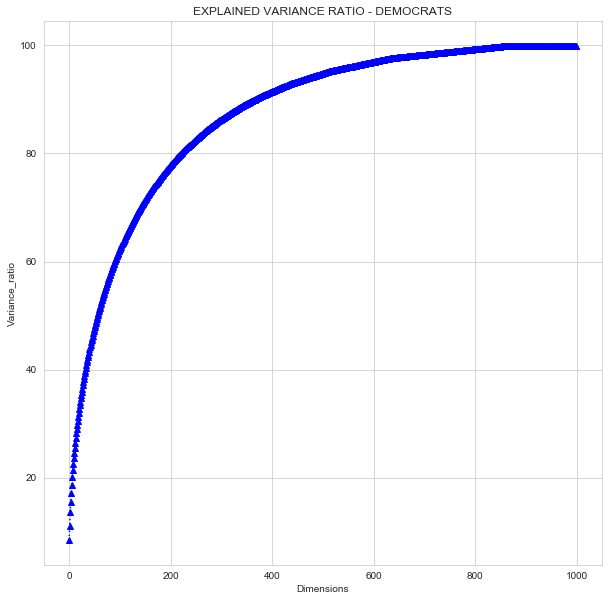

In [59]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

plt.plot(variance_Dem,color='blue', marker='^', linestyle = ':')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('Variance_ratio', fontsize=10)
plt.title('EXPLAINED VARIANCE RATIO - DEMOCRATS');

### 2.4.b.  Explained Variance Ratio - Republicans

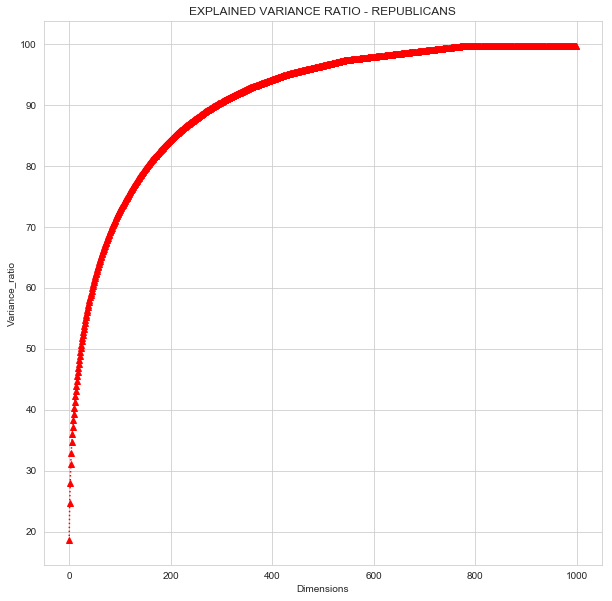

In [60]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

plt.plot(variance_Rep,color='red', marker='^', linestyle = ':')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('Variance_ratio', fontsize=10)
plt.title('EXPLAINED VARIANCE RATIO - REPUBLICANS');

### 2.5. Performing PCA with select number of components

In [61]:
# Fitting and normalizing data to PCA with 280 and 210 components respectively
# We use .fit_transform so that PCA result can be used in K means clustering.

from sklearn.decomposition import PCA
pca2_Dem = PCA(280).fit_transform(X_Dem_norm) 
pca2_Rep = PCA(210).fit_transform(X_Rep_norm)

print("No of Democratic Components in PCA2:'{}'".format(pca2_Dem.shape))
print("No of Republican Components in PCA2:'{}'".format(pca2_Rep.shape))

No of Democratic Components in PCA2:'(2935, 280)'
No of Republican Components in PCA2:'(2458, 210)'


### 2.6. K Means Clustering

In [72]:
from sklearn.cluster import KMeans
# Here we use pca2 result with selected no of components, explaining 85% of the variance in data for clustering
# Running K Means Clustering, use random_state=4 if you do not want clusters to change
kmeans_Dem = KMeans(n_clusters=5)
kmeans_Dem.fit(pca2_Dem)
pca2_Dem_clustered = kmeans_Dem.predict(pca2_Dem)

In [73]:
kmeans_Rep = KMeans(n_clusters=5)
kmeans_Rep.fit(pca2_Rep)
pca2_Rep_clustered = kmeans_Rep.predict(pca2_Rep)

In [74]:
# Identifying unique values based on number of clusters
# Each label represents which cluster the row of data belongs to.
# Kmeans.labels_ shows labels for clusters
# If you print kmeans.labels_ it will give you labels for all 4000 rows.

print('Democrat Clusters:', numpy.unique(kmeans_Dem.labels_))
print("Democrats length of rows:'{}'".format(len(kmeans_Dem.labels_)))
print('\nRepublican Clusters:', numpy.unique(kmeans_Rep.labels_))
print("Republicans length of rows:'{}'".format(len(kmeans_Rep.labels_)))

Democrat Clusters: [0 1 2 3 4]
Democrats length of rows:'2935'

Republican Clusters: [0 1 2 3 4]
Republicans length of rows:'2458'


In [75]:
# Value counts for each label - Democrats
x = kmeans_Dem.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   0,  157],
       [   1,  367],
       [   2,  410],
       [   3,  743],
       [   4, 1258]], dtype=int64)

In [76]:
# Value counts for each label - Repbulicans
x = kmeans_Rep.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   0,  412],
       [   1, 1194],
       [   2,  562],
       [   3,   50],
       [   4,  240]], dtype=int64)

In [77]:
# Each list in the array represents a cluster
# Each value in the cluster represents variable or a component column
# Two dimensional array, list with in list represent number of clusters
# Each cluster has 136(Columns) centroid values
# Rows = Clusters, Columns = Components 

centroids_Dem = kmeans_Dem.cluster_centers_
centroids_Rep = kmeans_Rep.cluster_centers_

# Printing all clusters with first three columns, pc1, pc2, pc3
print('\nDemocratic Clusters with Centroids:\n',centroids_Dem[:,0:4])
print("\nDemocratic Centroids Shape:'{}'".format(centroids_Dem.shape))

print('\nRepublican Clusters with Centroids:\n',centroids_Rep[:,0:4])
print("\nRepublican Centroids Shape:'{}'".format(centroids_Rep.shape))


Democratic Clusters with Centroids:
 [[-0.08746517 -0.21261996  0.3198257   0.06547262]
 [ 0.35003454 -0.05867743 -0.01578722  0.01182175]
 [-0.01286799  0.2128789   0.02392399  0.16287852]
 [-0.01216852  0.06546911  0.03181909 -0.12606205]
 [-0.07982    -0.06439424 -0.06189916  0.00975049]]

Democratic Centroids Shape:'(5, 280)'

Republican Clusters with Centroids:
 [[-0.09175677 -0.09167105  0.19620239  0.03619691]
 [ 0.0685936   0.00920738  0.00387654 -0.07092015]
 [-0.03919046 -0.0997268  -0.14860508  0.07695563]
 [ 0.58705759  0.29103525  0.13181511  0.47584304]
 [-0.21427002  0.28445649 -0.03557785  0.01135133]]

Republican Centroids Shape:'(5, 210)'


### 2.7. K Means Visualizations - Democrats

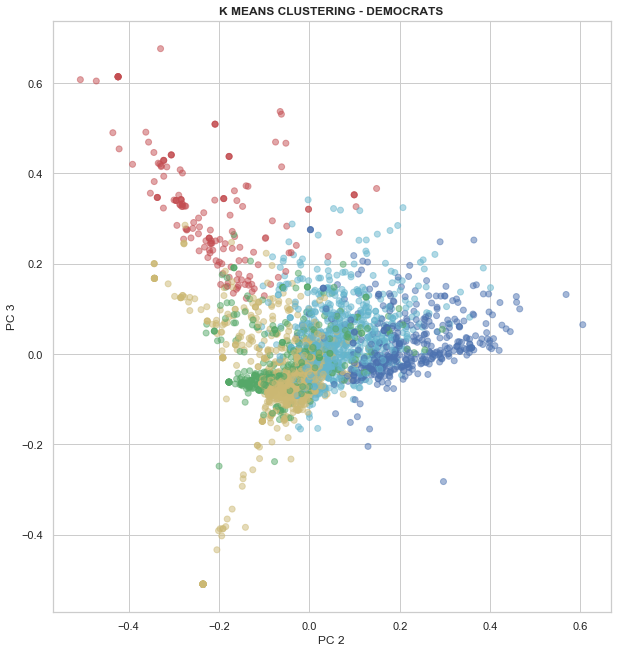

In [78]:
# Define color map
sns.set(style="whitegrid")

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3:'c', 4:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in pca2_Dem_clustered]

fig, ax = plt.subplots(figsize=(10, 20))

# cluster indices for the second and third components pc2, pc3
plt.scatter(pca2_Dem[:,1], pca2_Dem[:,2], c= label_color, alpha=0.5) 

plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title("K MEANS CLUSTERING - DEMOCRATS", fontweight='bold')
# plt.legend(loc=2)
ax.set_aspect('equal')

plt.show()

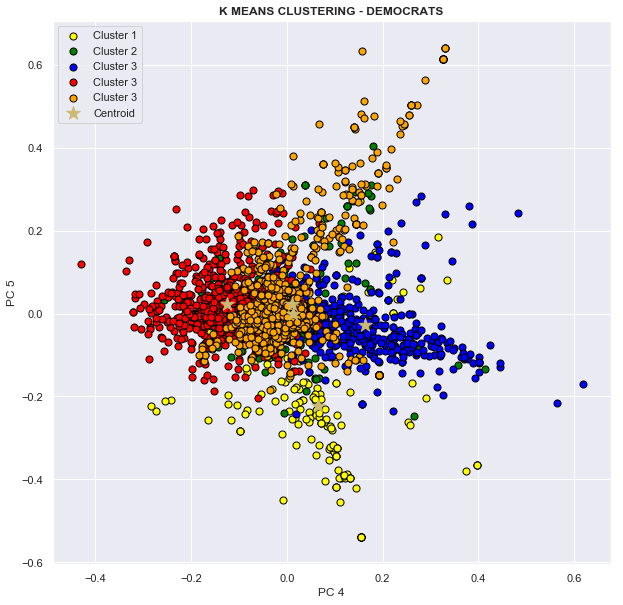

In [79]:
sns.set(style="darkgrid")
Clusters = kmeans_Dem.labels_

fig = plt.figure(figsize=(10, 10))

# Clusters for PCA 4 and PCA 5

plt.scatter(pca2_Dem[Clusters == 0, 3], pca2_Dem[Clusters == 0, 4], c='yellow', label='Cluster 1', s=50, edgecolor='black')
plt.scatter(pca2_Dem[Clusters == 1, 3], pca2_Dem[Clusters == 1, 4], c='green', label='Cluster 2', s=50, edgecolor='black')
plt.scatter(pca2_Dem[Clusters == 2, 3], pca2_Dem[Clusters == 2, 4], c='blue', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(pca2_Dem[Clusters == 3, 3], pca2_Dem[Clusters == 3, 4], c='red', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(pca2_Dem[Clusters == 4, 3], pca2_Dem[Clusters == 4, 4], c='orange', label='Cluster 3', s=50, edgecolor='black')


plt.scatter(centroids_Dem[:, 3], centroids_Dem[:, 4], c='y', s=200, marker='*', label = 'Centroid')

plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title("K MEANS CLUSTERING - DEMOCRATS", fontweight='bold')
plt.legend(loc=2)
ax.set_aspect('equal')


plt.show()

### 2.8. K Means Visualizations - Republicans

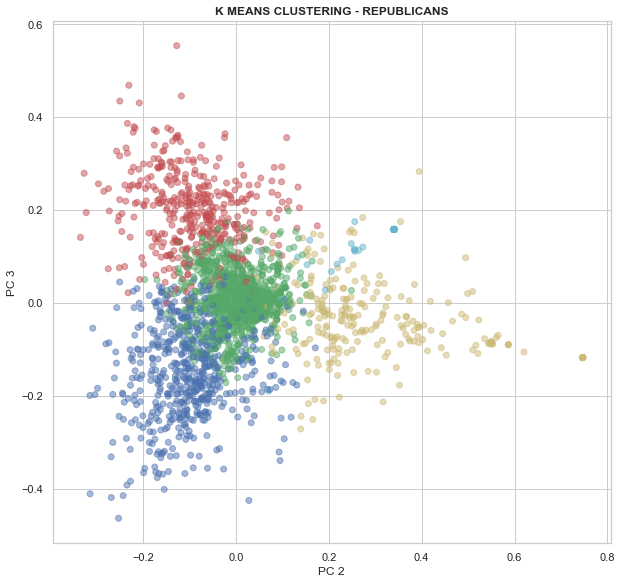

In [80]:
# Define color map
sns.set(style="whitegrid")

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3:'c', 4:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in pca2_Rep_clustered]

fig, ax = plt.subplots(figsize=(10, 20))

# cluster indices for the first and third PCA projections, pc2, pc3
plt.scatter(pca2_Rep[:,1], pca2_Rep[:,2], c= label_color, alpha=0.5) 

plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title("K MEANS CLUSTERING - REPUBLICANS", fontweight='bold')
# plt.legend(loc=2)
ax.set_aspect('equal')

plt.show()

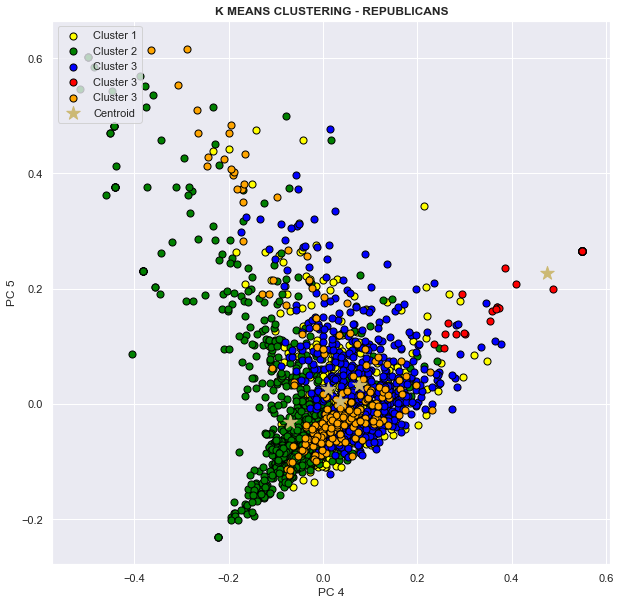

In [81]:
sns.set(style="darkgrid")
Clusters = kmeans_Rep.labels_

fig = plt.figure(figsize=(10, 10))

# Clusters for PCA 4 and PCA 5

plt.scatter(pca2_Rep[Clusters == 0, 3], pca2_Rep[Clusters == 0, 4], c='yellow', label='Cluster 1', s=50, edgecolor='black')
plt.scatter(pca2_Rep[Clusters == 1, 3], pca2_Rep[Clusters == 1, 4], c='green', label='Cluster 2', s=50, edgecolor='black')
plt.scatter(pca2_Rep[Clusters == 2, 3], pca2_Rep[Clusters == 2, 4], c='blue', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(pca2_Rep[Clusters == 3, 3], pca2_Rep[Clusters == 3, 4], c='red', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(pca2_Rep[Clusters == 4, 3], pca2_Rep[Clusters == 4, 4], c='orange', label='Cluster 3', s=50, edgecolor='black')


plt.scatter(centroids_Rep[:, 3], centroids_Rep[:, 4], c='y', s=200, marker='*', label = 'Centroid')

plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title("K MEANS CLUSTERING - REPUBLICANS", fontweight='bold')
plt.legend(loc=2)
ax.set_aspect('equal')


plt.show()

### 2.9.  K Means Elbow Method

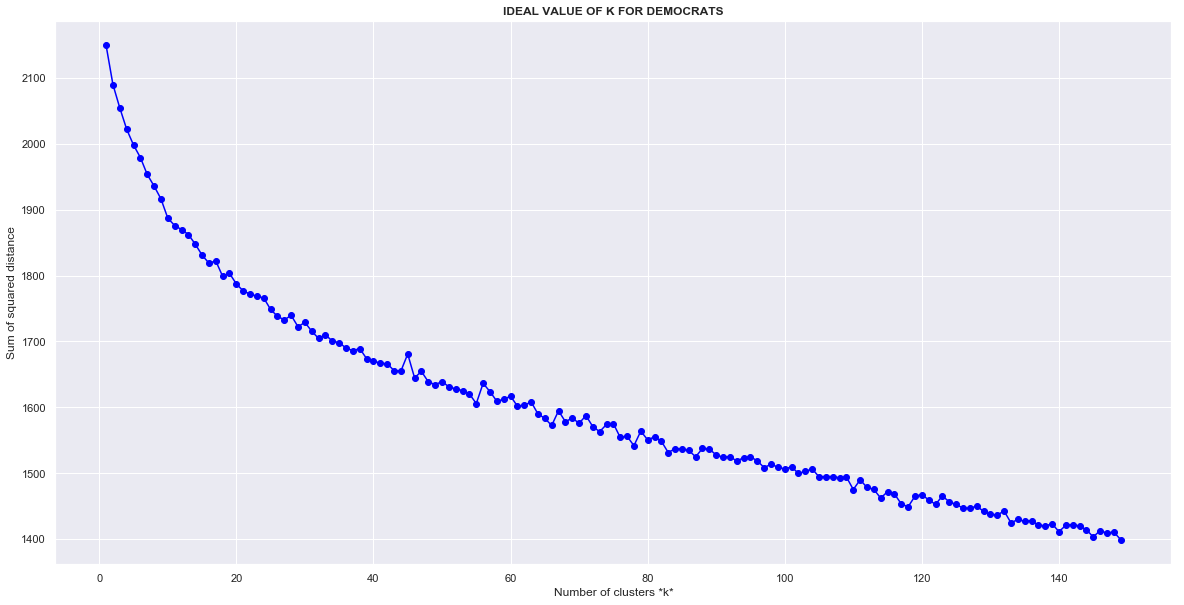

In [82]:
# Optimal number of Clusters using K Means Elbow Method
# Run the Kmeans algorithm and get the index of data points clusters
sns.set(style="darkgrid")

sse = []
list_k = list(range(1, 150))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca2_Dem)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(20, 10))
plt.plot(list_k, sse, '-o', color='blue')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title("IDEAL VALUE OF K FOR DEMOCRATS", fontweight='bold');

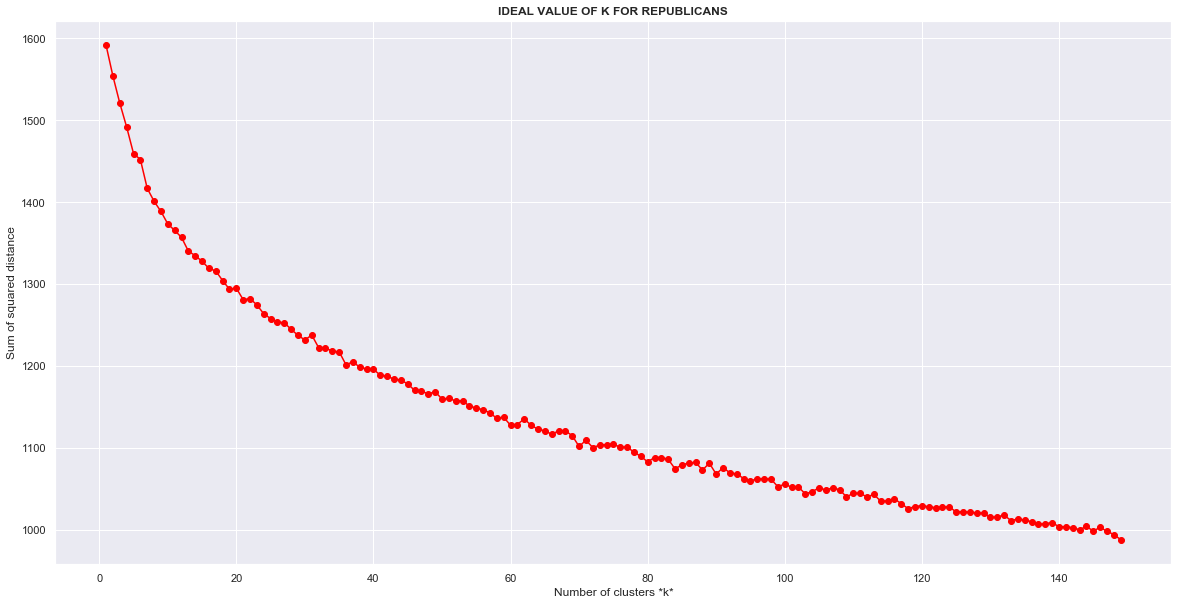

In [83]:
# Run the Kmeans algorithm and get the index of data points clusters
sns.set(style="darkgrid")

sse = []
list_k = list(range(1, 150))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca2_Rep)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(20, 10))
plt.plot(list_k, sse, '-o', color='red')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title("IDEAL VALUE OF K FOR REPUBLICANS", fontweight='bold');

### 3.0. SPLITTING DATA IN TO FOUR SAMPLES 
- Here we divide the data in to four different samples and check consistency of clusters across samples for both Democratic and Republican documents.

In [84]:
# Creating a dataframe to store features and predicted cluster memberships.
ypred_Dem = pd.DataFrame()

In [85]:
from sklearn.model_selection import train_test_split

# Splitting data in to halves for X_Dem_norm and pca2_Dem
# Ensure that data is divided in to four equal parts

X_Dem_norm_half1, X_Dem_norm_half2, pca2_Dem_half1, pca2_Dem_half2 = train_test_split(X_Dem_norm[0:2932,:], pca2_Dem[0:2932,:]\
                                                                                     ,test_size=0.5, random_state=42)

In [86]:
X1d, X2d, pca2_Dem1, pca2_Dem2 = train_test_split(X_Dem_norm_half1, pca2_Dem_half1, test_size = 0.5, random_state=42)
X3d, X4d, pca2_Dem3, pca2_Dem4 = train_test_split(X_Dem_norm_half2, pca2_Dem_half2, test_size = 0.5, random_state=42)

In [87]:
from sklearn.cluster import KMeans
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

some_list = [(X1d, pca2_Dem1), 
             (X2d, pca2_Dem2), 
             (X3d, pca2_Dem3),
             (X4d, pca2_Dem4)]

for counter, data in enumerate(some_list):
    
    # Put the features into ypred.
    ypred_Dem['pca_1' + '_sample_' + str(counter)] = data[1][:, 0]
    ypred_Dem['pca_2' + '_sample_' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred_Dem['clust' + str(nclust) + '_sample' + str(counter)] = pred
    

In [88]:
ypred_Dem.head()

,pca_1_sample_0,pca_2_sample_0,clust2_sample0,clust3_sample0,clust4_sample0,pca_1_sample_1,pca_2_sample_1,clust2_sample1,clust3_sample1,clust4_sample1,pca_1_sample_2,pca_2_sample_2,clust2_sample2,clust3_sample2,clust4_sample2,pca_1_sample_3,pca_2_sample_3,clust2_sample3,clust3_sample3,clust4_sample3
0,-0.065242,0.060981,1,1,3,0.089807,0.140408,0,2,3,-0.090032,0.120588,1,1,1,-0.069776,0.204575,0,0,0
1,-0.075954,0.398198,1,1,0,-0.102845,-0.085080,1,1,0,-0.068572,0.022499,1,1,1,-0.088248,-0.048346,0,0,3
2,-0.072331,-0.020145,1,1,1,0.325711,0.061158,0,0,3,0.407087,-0.127953,0,0,0,-0.087284,0.292606,0,0,2
3,-0.090957,-0.067765,1,1,1,-0.089208,-0.066724,1,1,0,-0.094113,-0.066514,1,1,1,-0.075545,-0.048459,0,0,3
4,0.113843,-0.012047,0,0,2,0.038033,0.060182,1,2,2,-0.092510,0.076434,1,2,3,-0.085694,0.186369,0,0,2


### 3.1. Four Sample K Means visualizations - Democrats

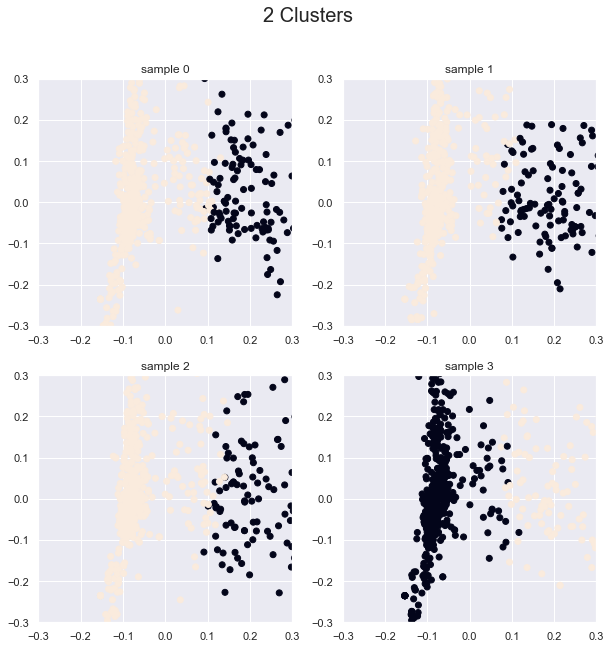

<Figure size 1440x1440 with 0 Axes>

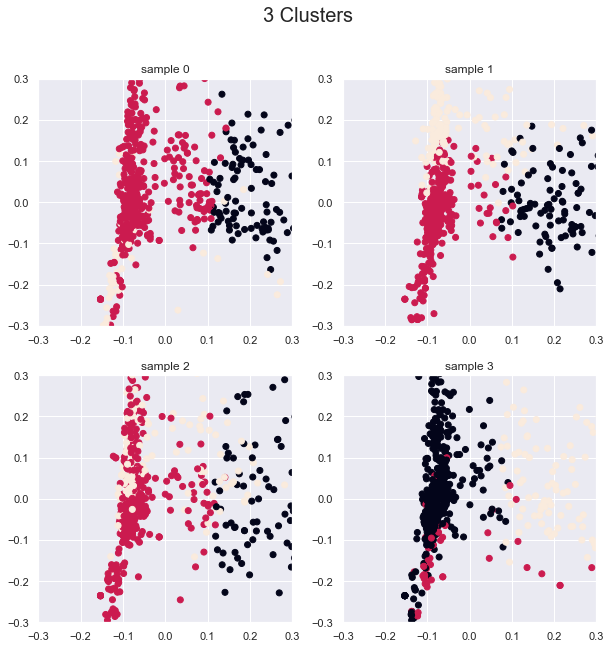

<Figure size 1440x1440 with 0 Axes>

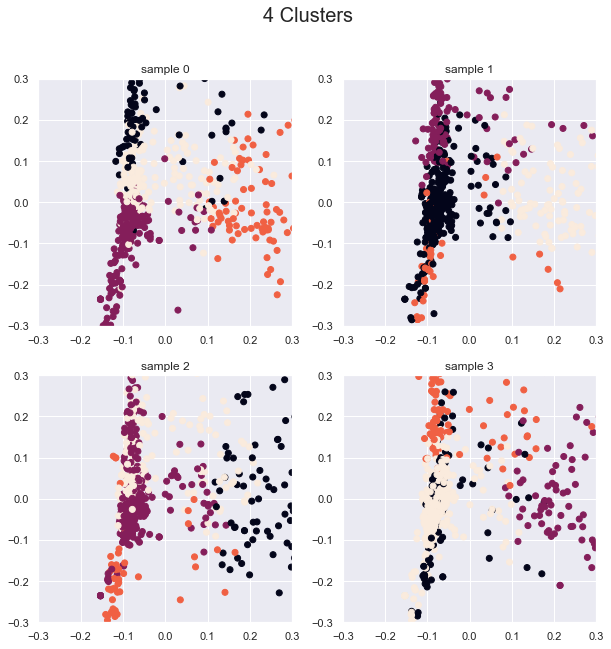

<Figure size 1440x1440 with 0 Axes>

In [89]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.

for cluster in range(2, 5):

 
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2,figsize=[10, 10])
    
        
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_Dem['pca_1_sample_{}'.format(i)]
        y_sub = ypred_Dem['pca_2_sample_{}'.format(i)]
        
        #LABEL_COLOR_MAP = {0 : 'c',1 : 'g',2 : 'black', 3:'b', 4:'red'}
        #label_color = [LABEL_COLOR_MAP[l] for l in X_pca_clustered]
        
        # Cluster assignments.
        c = ypred_Dem['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.figure(figsize=(20, 20))
    plt.tight_layout()
    plt.show()
    print('\n')

### 3.2. Four Sample K Means Silhouette Score - Democrats

In [90]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Dem1, pca2_Dem2, pca2_Dem3, pca2_Dem4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.025774615797605836
0.028831397709440376
0.02253334495428796
0.0269507507516625


In [91]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Dem1, pca2_Dem2, pca2_Dem3, pca2_Dem4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.0312662684362064
0.02695221694932448
0.031824914658706856
0.031550012735541526


In [92]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Dem1, pca2_Dem2, pca2_Dem3, pca2_Dem4]:
    model = KMeans(n_clusters=100, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.054341595796226334
0.03602623172965716
0.03347874124341747
0.05282052396915217


### 3.3. Splitting Data in to four samples - Republicans

In [93]:
# Creating a dataframe to store features and predicted cluster memberships.
ypred_Rep = pd.DataFrame()

In [94]:
X_Rep_norm.shape

(2458, 1000)

In [95]:
len(X_Rep_norm[0:660,:])

660

In [96]:
from sklearn.model_selection import train_test_split

# Splitting data in to halves for X_Rep_norm and pca2_Rep
# Ensure that data is divided in to four equal parts

X_Rep_norm_half1, X_Rep_norm_half2, pca2_Rep_half1, pca2_Rep_half2 = train_test_split(X_Rep_norm[0:660,:], pca2_Rep[0:660,:]\
                                                                                     ,test_size=0.5, random_state=42)

In [97]:
X1d, X2d, pca2_Rep1, pca2_Rep2 = train_test_split(X_Rep_norm_half1, pca2_Rep_half1, test_size = 0.5, random_state=42)
X3d, X4d, pca2_Rep3, pca2_Rep4 = train_test_split(X_Rep_norm_half2, pca2_Rep_half2, test_size = 0.5, random_state=42)

In [98]:
from sklearn.cluster import KMeans
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

some_list = [(X1d, pca2_Rep1), 
             (X2d, pca2_Rep2), 
             (X3d, pca2_Rep3),
             (X4d, pca2_Rep4)]

for counter, data in enumerate(some_list):
    
    # Put the features into ypred.
    ypred_Rep['pca_1' + '_sample_' + str(counter)] = data[1][:, 0]
    ypred_Rep['pca_2' + '_sample_' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred_Rep['clust' + str(nclust) + '_sample' + str(counter)] = pred
    

In [99]:
ypred_Rep.head()

,pca_1_sample_0,pca_2_sample_0,clust2_sample0,clust3_sample0,clust4_sample0,pca_1_sample_1,pca_2_sample_1,clust2_sample1,clust3_sample1,clust4_sample1,pca_1_sample_2,pca_2_sample_2,clust2_sample2,clust3_sample2,clust4_sample2,pca_1_sample_3,pca_2_sample_3,clust2_sample3,clust3_sample3,clust4_sample3
0,-0.003455,-0.094541,1,2,3,0.090948,-0.012214,1,1,2,0.026577,-0.174304,1,1,2,-0.109584,-0.113625,0,1,3
1,-0.231243,-0.154519,0,2,3,-0.129408,-0.161135,1,1,3,-0.023972,-0.107849,1,0,3,-0.010856,-0.137166,1,2,0
2,0.068957,-0.001816,1,1,1,-0.182674,-0.279778,1,1,2,-0.169747,-0.326524,1,1,3,0.007422,-0.096151,1,1,0
3,0.015664,-0.036523,1,1,0,-0.099257,-0.059828,1,2,0,0.037299,-0.068039,1,1,2,-0.005302,-0.116570,1,2,3
4,0.041454,-0.078598,1,1,1,-0.106876,-0.046534,1,1,3,0.044993,-0.035919,1,0,2,-0.052778,-0.202068,1,0,1


### 3.4. Four Sample K Means visualizations - Republicans

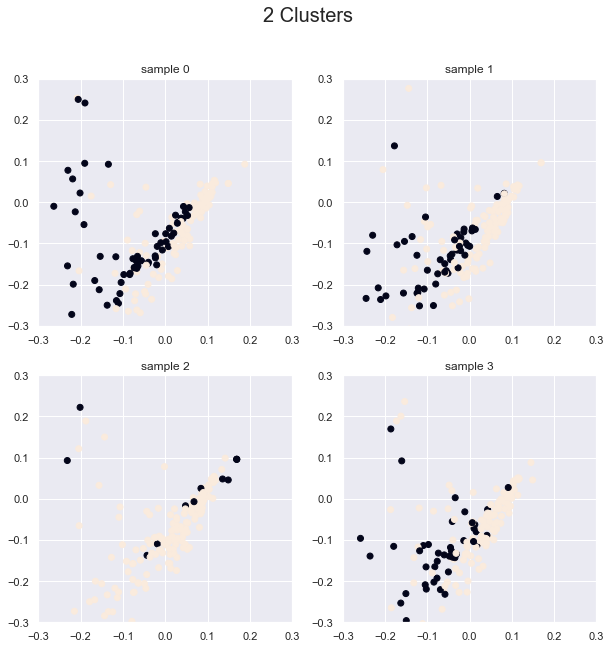

<Figure size 1440x1440 with 0 Axes>

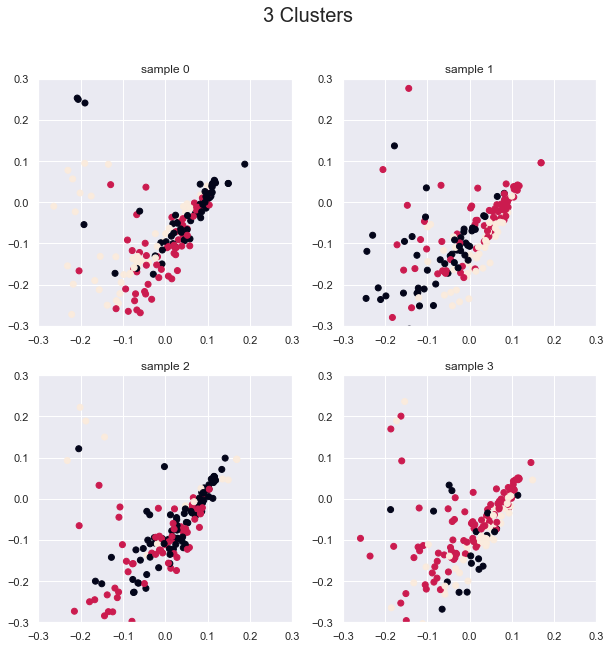

<Figure size 1440x1440 with 0 Axes>

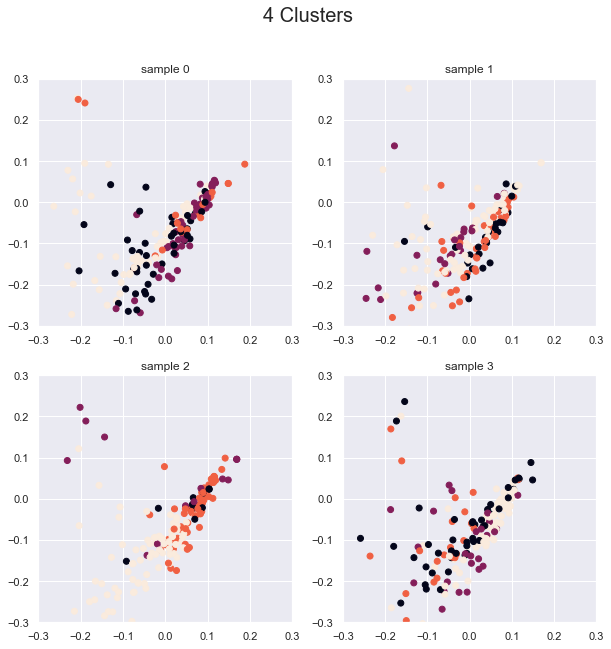

<Figure size 1440x1440 with 0 Axes>

In [100]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.

for cluster in range(2, 5):

 
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2,figsize=[10, 10])
    
        
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_Rep['pca_1_sample_{}'.format(i)]
        y_sub = ypred_Rep['pca_2_sample_{}'.format(i)]
        
        #LABEL_COLOR_MAP = {0 : 'c',1 : 'g',2 : 'black', 3:'b', 4:'red'}
        #label_color = [LABEL_COLOR_MAP[l] for l in X_pca_clustered]
        
        # Cluster assignments.
        c = ypred_Rep['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.figure(figsize=(20, 20))
    plt.tight_layout()
    plt.show()
    print('\n')

### 3.5. Four Sample K Means Silhouette Score - Republicans

In [101]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Rep1, pca2_Rep2, pca2_Rep3, pca2_Rep4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.03665289988689408
0.038636702132142105
0.09594765114741433
0.028928030903656934


In [102]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Rep1, pca2_Rep2, pca2_Rep3, pca2_Rep4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.03170037543462653
0.03457756777976529
0.025476752530017764
0.032080254493672106


In [103]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [pca2_Rep1, pca2_Rep2, pca2_Rep3, pca2_Rep4]:
    model = KMeans(n_clusters=100, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.076677224393645
0.05799359945152865
0.02471765291855124
0.030014985732448547


### 4.0.  WORD TOKENIZATION 

In [104]:
#pre-processing
import re 
def clean_words(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", " ", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string) 
    string = re.sub("[\(.*?[\)]", " ", string)
    string = re.sub('\W+'," ", string ) # removes punctuation
    return string.strip().lower()

In [105]:
words_D = clean_words(Democratic)
words_R = clean_words(Republican)

In [106]:
# Removing all the stop words
from nltk.corpus import stopwords
 #set(stopwords.words('english'))
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
words_D = pattern.sub('', words_D)
words_R = pattern.sub('', words_R)

In [107]:
from nltk.tokenize import word_tokenize
tokenized_words_D = word_tokenize(words_D)
tokenized_words_R = word_tokenize(words_R)
# print(tokenized_word)

In [108]:
# Obtaining frequency distribution of words
from nltk.probability import FreqDist
fdist_D = FreqDist(tokenized_words_D)
fdist_R = FreqDist(tokenized_words_R)
print(fdist_D)
print(fdist_R)

<FreqDist with 8423 samples and 87661 outcomes>
<FreqDist with 10271 samples and 115064 outcomes>


### 4.1. Frequency Distribution - Democratic Words

In [109]:
# Frequency distribution of 10 most common words
print('Democratic:\n', fdist_D.most_common()[0:10])

Democratic:
 [('people', 750), ('new', 686), ('must', 661), ('us', 590), ('america', 579), ('year', 554), ('world', 502), ('years', 496), ('american', 489), ('congress', 455)]


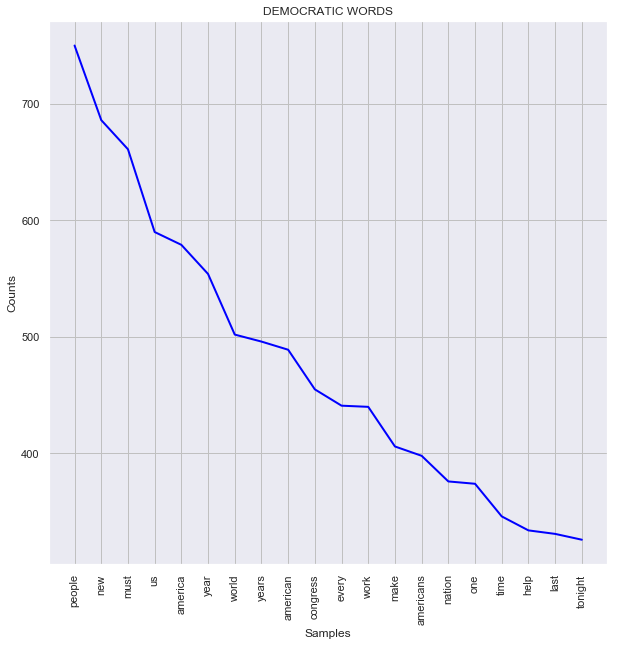

In [110]:
# Frequency Distribution Plot for Democrats
plt.figure(figsize=(10,10))
fdist_D.plot(20,cumulative=False, title="DEMOCRATIC WORDS", color='blue')
plt.show()

### 4.2. Frequency Distribution - Republican Words

In [111]:
# Frequency distribution of 10 most common words
print('Republican:\n', fdist_R.most_common()[0:10])

Republican:
 [('must', 878), ('world', 819), ('people', 755), ('government', 729), ('congress', 692), ('year', 687), ('america', 657), ('us', 643), ('new', 623), ('federal', 495)]


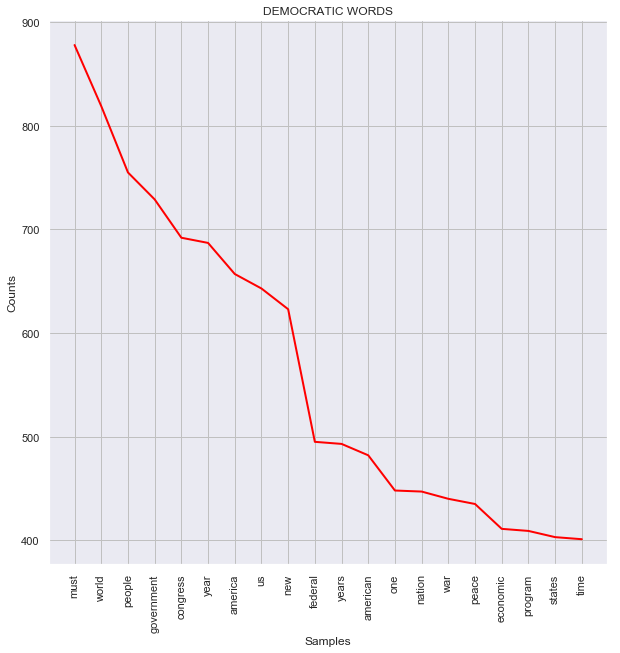

In [112]:
# Frequency Distribution for Republican
plt.figure(figsize=(10,10))
fdist_R.plot(20,cumulative=False, title="DEMOCRATIC WORDS", color='red')
plt.show()

### 5.0. TF-IDF SCORES

- Treating sentences in both corpuses as individual documents

In [113]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'-',' ',text)# removing single dash -
    text = re.sub(r'--',' ',text) # removing double dash --
    text = re.sub("[\[].*?[\]]", "", text) # removing brackets
    text = re.sub(r"\d", " ", text) # removing digits
    text = re.sub(r"[@\,:'?\$%_]", "", text) # removing punctuation and special charecters except period.
    text = re.sub(r'"', '', text)# removing double quotes
    text = ' '.join(text.split()) # v Imp
    return text.strip().lower()

### 5.1. Tf-idf scores for Democratic Sentences

In [114]:
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Passing document through text cleaner
Democratic = text_cleaner(Democratic_raw)

In [115]:
# Split in to sentences
Democratic_sen = nltk.sent_tokenize(Democratic)

In [116]:
Democratic_sen[0:10]

['president john f. kennedys special message to the congress on urgent national needs may mr. speaker mr. vice president my copartners in government gentlemen and ladies the constitution imposes upon me the obligation to from time to time give to the congress information of the state of the union.',
 'while this has traditionally been interpreted as an annual affair this tradition has been broken in extraordinary times.',
 'these are extraordinary times.',
 'and we face an extraordinary challenge.',
 'our strength as well as our convictions have imposed upon this nation the role of leader in freedoms cause.',
 'no role in history could be more difficult or more important.',
 'we stand for freedom.',
 'that is our conviction for ourselves that is our only commitment to others.',
 'no friend no neutral and no adversary should think otherwise.',
 'we are not against any man or any nation or any system except as it is hostile to freedom.']

In [117]:
# Importing the vectorizer
vectorizer_D = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

#Applying the vectorizer
Dem_sen_tfidf = vectorizer_D.fit_transform(Democratic_sen)

print("Democratic Number of features: %d" % Dem_sen_tfidf.get_shape()[1])
print('\nDemocratic Feature names:\n', vectorizer_D.get_feature_names()[0:50])

#Reshapes the vectorizer output into something people can read
Dem_sen_tfidf_csr = Dem_sen_tfidf.tocsr()

#number of paragraphs
n = Dem_sen_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
Dem_tfidf_bysen = [{} for _ in range(0,n)]

#List of features
terms = vectorizer_D.get_feature_names()

#for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*Dem_sen_tfidf_csr.nonzero()):
    Dem_tfidf_bysen[i][terms[j]] = Dem_sen_tfidf_csr[i, j]

print('\nOriginal sentence:\n', Democratic_sen[3])
print('\nTf_idf vector:\n', Dem_tfidf_bysen[3])

Democratic Number of features: 5152

Democratic Feature names:
 ['aaron', 'abandon', 'abandoned', 'abandoning', 'abiding', 'ability', 'able', 'abraham', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'abundance', 'abundantly', 'abuse', 'abuses', 'abusive', 'academic', 'accelerate', 'accelerating', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'accidental', 'accomplish', 'accomplished', 'accord', 'according', 'account', 'accountability', 'accountable', 'accountants', 'accounts', 'accumulating', 'accurately', 'achievable', 'achieve', 'achieved', 'achievement', 'achievements', 'achieving', 'acknowledge', 'acres', 'act', 'acted', 'acting']

Original sentence:
 and we face an extraordinary challenge.

Tf_idf vector:
 {'extraordinary': 0.6981962064604438, 'face': 0.5290962026904686, 'challenge': 0.48226472562563805}


In [118]:
# First column: Sentence, Second column: Feature, Third column: Tf-idf score 
print('\nDemocratic Sentences TF-IDF:\n', Dem_sen_tfidf[0:1])


Democratic Sentences TF-IDF:
   (0, 3435)	0.2895457226483289
  (0, 2533)	0.20456920352266778
  (0, 2566)	0.2395240601351761
  (0, 4306)	0.17590855086553242
  (0, 2880)	0.19676175525707854
  (0, 880)	0.23787381535981367
  (0, 4894)	0.21018318961417587
  (0, 2993)	0.1457920652121063
  (0, 3016)	0.16906406679250457
  (0, 2973)	0.37101574560016437
  (0, 4304)	0.18550787280008219
  (0, 4928)	0.1835697573101248
  (0, 2042)	0.12999738210750883
  (0, 1999)	0.2644211447907837
  (0, 2601)	0.2644211447907837
  (0, 910)	0.20211911002717892
  (0, 3077)	0.21712926099503738
  (0, 4688)	0.25404576060242706
  (0, 2392)	0.18295112183894816
  (0, 4369)	0.15413033745295932
  (0, 4852)	0.15627263726231613


In [119]:
# Feature name for Sentence 0, Column 3435, Tf-idf score 0.28
print("\nDemocratic Feature:\n'{}'".format(vectorizer_D.get_feature_names()[3435]))


Democratic Feature:
'president'


In [120]:
Dem_sen_tfidf.shape

(8931, 5152)

### 5.1.a. Dimensionality Reduction - Democratic Sentences

   - **Latent Semantic Analysis** is a process of applying PCA to a tf-idf term-document matrix. 
   - What we get is clusters of terms that presumably reflect a topic. 
   - Each document will get a score for each topic.
   - Higher scores indicate that the document is relevant to the topic. 
   - Documents can pertain to more than one topic.

LSA is handy when corpus is too large to topically annotate by hand. Or when we don't know what topics characterize our documents.It is also a useful way of creating features to be used in other models.

In [121]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 5152 to 1820.
svd= TruncatedSVD(1820)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
Dem_lsa = lsa.fit_transform(Dem_sen_tfidf)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of sentences our solution considers similar, for the first five identified topics
sents_by_component_D = pd.DataFrame(Dem_lsa, index = Democratic_sen)

Percent variance captured by all components: 85.99136121920867


In [122]:
sents_by_component_D.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819
president john f. kennedys special message to the congress on urgent national needs may mr. speaker mr. vice president my copartners in government gentlemen and ladies the constitution imposes upon me the obligation to from time to time give to the congress information of the state of the union.,0.008916,0.162649,0.025886,-0.020468,0.110045,-0.004647,0.077821,-0.216047,0.118539,0.212863,...,0.007402,0.003388,0.000516,0.012729,-0.004258,-0.001346,-0.024664,0.010296,-0.001536,-0.010626
while this has traditionally been interpreted as an annual affair this tradition has been broken in extraordinary times.,0.000634,0.015157,0.001505,-0.008592,0.006090,-0.003226,0.000389,-0.007478,-0.003533,0.004038,...,0.004169,-0.018158,-0.004828,-0.007730,0.009072,-0.031819,0.013468,0.001219,-0.013476,0.005555
these are extraordinary times.,0.000620,0.012654,0.001305,-0.001409,-0.000102,0.000554,0.001515,-0.006061,0.000693,-0.001815,...,0.002054,-0.012436,-0.000147,0.003419,-0.004045,0.000185,-0.003465,-0.001289,-0.002036,0.000957


### 5.1.b. Tf-idf Sentence Similarity scores - Democrats

In [123]:
for i in range(5):
    print('Component {}:'.format(i))
    print(sents_by_component_D.loc[:,i].sort_values(ascending=False)[0:5])

Component 0:
(applause.)    0.992811
(applause.)    0.992811
(applause.)    0.992811
(applause.)    0.992811
(applause.)    0.992811
Name: 0, dtype: float64
Component 1:
people are out of work.                                                                                                                                                                                                   0.340625
tonight the american people know we have to change.                                                                                                                                                                       0.332157
people who work hard still need support to get ahead in the new economy.                                                                                                                                                  0.327494
in congress cut the taxes of million hard pressed working families to make sure that no parents who work full time would have to raise their children

### 5.1.c. K Means Clustering - Democratic Sentences

Democrat Clusters: [0 1 2 3 4]
Democrats length of rows:'8931'

Democratic Clusters with Centroids:
 [[ 4.32553724e-03  1.18082772e-01  1.07062619e-02  1.59536744e-02]
 [ 6.40801078e-03  1.27491509e-01  7.11636481e-02 -4.54680218e-02]
 [ 9.40128115e-01 -3.39978929e-02  3.59743393e-04  4.91968829e-04]
 [ 4.65845235e-03  1.27746690e-01 -1.63157018e-02  2.20437510e-01]
 [ 3.27426739e-03  7.19756745e-02 -3.00619338e-03 -1.12473514e-02]]

Democratic Centroids Shape:'(5, 1820)'


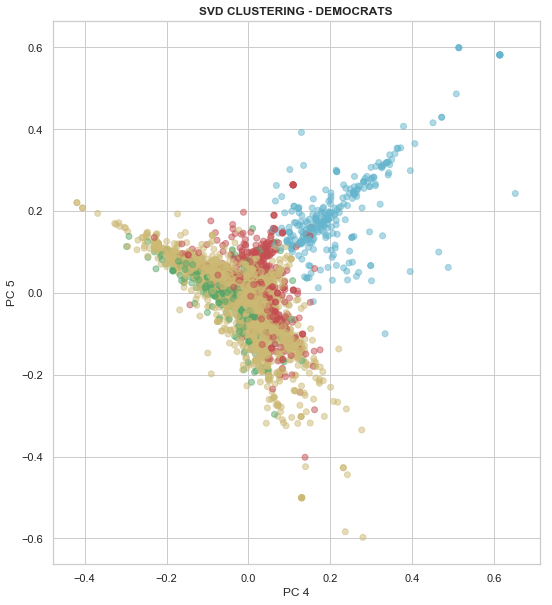

In [124]:
from sklearn.cluster import KMeans
# Running K Means Clustering, use random_state=4 if you do not want clusters to change
kmeans_svd_Dem = KMeans(n_clusters=5)
kmeans_svd_Dem.fit(Dem_lsa)
kmeans_svd__Dem_clustered = kmeans_svd_Dem.predict(Dem_lsa)

print('Democrat Clusters:', numpy.unique(kmeans_svd_Dem.labels_))
print("Democrats length of rows:'{}'".format(len(kmeans_svd_Dem.labels_)))

# Value counts for each label - Democrats
x = kmeans_svd_Dem.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T


centroids_Dem = kmeans_svd_Dem.cluster_centers_

print('\nDemocratic Clusters with Centroids:\n',centroids_Dem[:,0:4])
print("\nDemocratic Centroids Shape:'{}'".format(centroids_Dem.shape))

# Define color map
sns.set(style="whitegrid")

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3:'c', 4:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeans_svd__Dem_clustered]

fig, ax = plt.subplots(figsize=(10, 10))

# cluster indices for the first and third PCA projections, pc2, pc3
plt.scatter(Dem_lsa[:,3], Dem_lsa[:,4], c= label_color, alpha=0.5) 

plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title("SVD CLUSTERING - DEMOCRATS", fontweight='bold')
# plt.legend(loc=2)
ax.set_aspect('equal')

plt.show()

### 5.1.d. Silhouette Coefficent - Democratic Sentences

In [125]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [Dem_lsa]:
    model = KMeans(n_clusters= 5, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.015383439940642358


### 5.2. Tf-idf scores for Republican Sentences

In [126]:
# Passing document through text cleaner

Republican = text_cleaner(Republican_raw)

# Split in to sentences
Republican_sen = nltk.sent_tokenize(Republican)

vectorizer_R = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

#Applying the vectorizer
Rep_sen_tfidf = vectorizer_R.fit_transform(Republican_sen)

print("Republican Number of features: %d" % Rep_sen_tfidf.get_shape()[1])
print('\nRepublican Features:\n', vectorizer_R.get_feature_names()[0:10])

#Reshapes the vectorizer output into something people can read
Rep_sen_tfidf_csr = Rep_sen_tfidf.tocsr()

#number of paragraphs
n = Rep_sen_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
Rep_tfidf_bysen = [{} for _ in range(0,n)]

#List of features
terms = vectorizer_R.get_feature_names()

#for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*Rep_sen_tfidf_csr.nonzero()):
    Rep_tfidf_bysen[i][terms[j]] = Rep_sen_tfidf_csr[i, j]

print('\nOriginal sentence:\n', Republican_sen[3])
print('\nTf_idf vector:\n', Rep_tfidf_bysen[3])

Republican Number of features: 6219

Republican Features:
 ['abandon', 'abandoned', 'abandoning', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'aboard']

Original sentence:
 the most eloquent tribute would be a reverent silence.

Tf_idf vector:
 {'eloquent': 0.5921778378830158, 'tribute': 0.5250493154186042, 'silence': 0.6112680465218607}


In [127]:
# First column: Sentence, Second column: Feature, Third column: Tf-idf score 
print('Republican Sentences TFIDF:\n', Rep_sen_tfidf[0:1])

Republican Sentences TFIDF:
   (0, 4175)	0.31348366871521793
  (0, 2594)	0.24494318097569634
  (0, 5766)	0.2548016499668131
  (0, 96)	0.18900960609795367
  (0, 3094)	0.20065113815671826
  (0, 4997)	0.19091527251034532
  (0, 1093)	0.35890033681748057
  (0, 320)	0.23534162054685237
  (0, 3593)	0.393711401580452
  (0, 5189)	0.1924256844588767
  (0, 3459)	0.17661190028973975
  (0, 2631)	0.2221091062007061
  (0, 2621)	0.20133154585545876
  (0, 5253)	0.19091527251034532
  (0, 2363)	0.18809903150931245
  (0, 947)	0.24224954331940732
  (0, 5861)	0.13610944334794728
  (0, 5273)	0.134321385555525


In [128]:
# Feature name for Sentence 0, Column 4175, Tf-idf score 0.31
print("republican Feature:\n'{}'".format(vectorizer_R.get_feature_names()[4175]))

republican Feature:
'president'


In [129]:
Rep_sen_tfidf.shape

(11049, 6219)

### 5.2.a. Dimensionality Reduction - Republican Sentences

In [130]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 6219 to 100.
svd = TruncatedSVD(2300)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
Rep_lsa = lsa.fit_transform(Rep_sen_tfidf)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 85.69029838028676


In [131]:
sents_by_component_R = pd.DataFrame(Rep_lsa, index = Republican_sen)
sents_by_component_R.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299
president harry s. trumans address before a joint session of the congress april mr. speaker mr. president members of the congress it is with a heavy heart that i stand before you my friends and colleagues in the congress of the united states.,0.000589,0.172270,-0.055618,-0.250684,-0.304606,0.385510,0.144443,0.007871,0.048224,-0.013646,...,0.000307,0.004586,0.010731,-0.011040,-0.007624,0.004804,0.012199,0.001927,0.004503,0.004575
only yesterday we laid to rest the mortal remains of our beloved president franklin delano roosevelt.,0.000165,0.030561,-0.012865,-0.033498,-0.037389,0.058310,-0.001732,-0.007840,0.018740,-0.006043,...,0.026223,-0.007775,-0.012245,-0.025459,-0.025334,-0.011724,-0.007594,-0.009714,0.018794,0.010863
at a time like this words are inadequate.,0.000034,0.054807,-0.015303,-0.017064,-0.015748,-0.006694,-0.053416,-0.017010,-0.017276,0.104520,...,0.006998,0.001237,0.006871,0.010060,-0.006557,-0.002182,-0.001803,-0.001287,0.000094,0.010637


### 5.2.b. Tf-idf Sentence Similarity scores - Republican

In [132]:
#Looking at what sorts of sentences our solution considers similar, for the first five identified topics
for i in range(5):
    print('Component {}:'.format(i))
    print(sents_by_component_R.loc[:,i].sort_values(ascending=False)[0:5])

Component 0:
(applause.)    0.999992
(applause.)    0.999992
(applause.)    0.999992
(applause.)    0.999992
(applause.)    0.999992
Name: 0, dtype: float64
Component 1:
but my colleagues this i believe with the help of god who has blessed this land so richly with the cooperation of the congress and with the support of the american people we can and we will make the year a year of unprecedented progress toward our goal of building a structure of lasting peace in the world and a new prosperity without war in the united states of america.    0.397350
tonight for the first time in years a president of the united states can report to the congress on the state of a union at peace with every nation of the world.                                                                                                                                                                                                                        0.378795
most important because of the beginnings that have been made

### 5.2.c. K Means Clustering - Republican Sentences

Republican Clusters: [0 1 2 3 4]
Republican length of rows:'11049'

Republican Clusters with Centroids:
 [[ 1.67947183e-04  1.38257887e-01 -6.27754074e-02 -5.24749135e-02]
 [ 1.90593054e-04  1.49601779e-01  2.17351611e-01  4.29759724e-02]
 [ 4.19352201e-04  6.51339056e-02 -7.34919172e-03 -2.21596924e-02]
 [ 1.21418926e-04  1.33259432e-01 -9.01341837e-02  1.23474888e-01]
 [ 9.99991799e-01 -1.50817872e-03  5.09608641e-05  8.57789814e-04]]

Republican Centroids Shape:'(5, 2300)'


Text(0.5, 1.0, 'SVD CLUSTERING - REPUBLICANS')

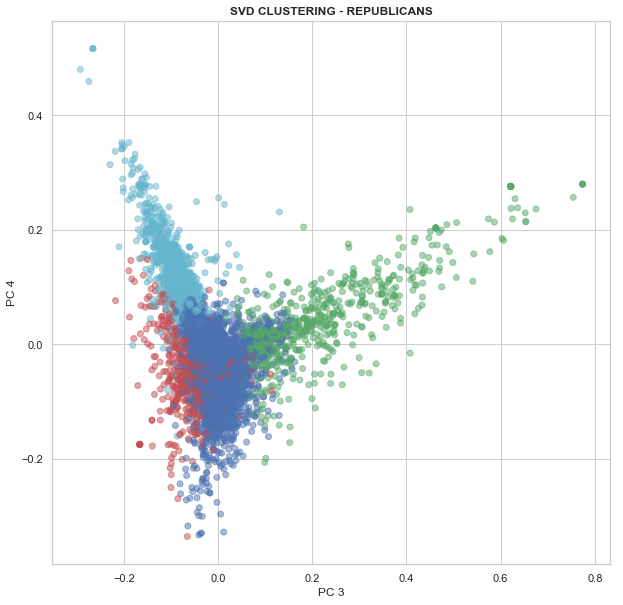

In [133]:
from sklearn.cluster import KMeans
# Here we use pca2 result with selected no of components, explaining 85% of the variance in data for clustering
# Running K Means Clustering, use random_state=4 if you do not want clusters to change
kmeans_svd_Rep = KMeans(n_clusters=5)
kmeans_svd_Rep.fit(Rep_lsa)
kmeans_svd_Rep_clustered = kmeans_svd_Rep.predict(Rep_lsa)

print('Republican Clusters:', numpy.unique(kmeans_svd_Rep.labels_))
print("Republican length of rows:'{}'".format(len(kmeans_svd_Rep.labels_)))

# Value counts for each label - Repocrats
x = kmeans_svd_Rep.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

centroids_Rep = kmeans_svd_Rep.cluster_centers_

print('\nRepublican Clusters with Centroids:\n',centroids_Rep[:,0:4])
print("\nRepublican Centroids Shape:'{}'".format(centroids_Rep.shape))

# Define color map
sns.set(style="whitegrid")

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3:'c', 4:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeans_svd_Rep_clustered]

fig, ax = plt.subplots(figsize=(10, 10))

# cluster indices for the first and third PCA projections, pc2, pc3
plt.scatter(Rep_lsa[:,2], Rep_lsa[:,3], c= label_color, alpha=0.5) 

plt.xlabel('PC 3')
plt.ylabel('PC 4')
plt.title("SVD CLUSTERING - REPUBLICANS", fontweight='bold')

### 5.2.d. Silhouette Coefficent - Republican Sentences

In [134]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [Rep_lsa]:
    model = KMeans(n_clusters=5, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.022003473679863675


## 6.0.  Word2Vec Approach

- Step 1: Pass the document through Text Cleaner - completed
- Step 2: Parse the document through spacy - completed
- Step 3: Organize document in to sentences, filtering out punctuation


In [135]:
# Organize the parsed doc into sentences, while filtering out punctuation
# and stop words, and converting words to lower case lemmas.
sentences_wv_D = []
for sentence in Democratic_doc.sents:
    sentence = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences_wv_D.append(sentence)


sentences_wv_R = []
for sentence in Republican_doc.sents:
    sentence = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences_wv_R.append(sentence)    
    
    
    
print('1. Democratic Sentence:\n', sentences_wv_D[1])
print('\n2. Republican Sentence:\n', sentences_wv_R[3])

print('\n3. We have {} Democratic sentences and {} tokens.'.format(len(sentences_wv_D), len(Democratic_doc)))
print('4. We have {} Republican sentences and {} tokens.'.format(len(sentences_wv_R), len(Republican_doc)))

1. Democratic Sentence:
 ['constitution', 'impose', 'obligation', 'time', 'time', 'congress', 'information', 'state', 'union', 'traditionally', 'interpret', 'annual', 'affair', 'tradition', 'break', 'extraordinary', 'time', 'extraordinary', 'time', 'face', 'extraordinary', 'challenge', 'strength', 'conviction', 'impose', 'nation', 'role', 'leader', 'freedom', 's', 'because', 'role', 'history', 'difficult', 'important', 'stand', 'freedom', 'conviction', 'commitment']

2. Republican Sentence:
 ['heavy', 'heart', 'stand', 'friend', 'colleague', 'congress', 'united', 'state']

3. We have 2935 Democratic sentences and 175628 tokens.
4. We have 2458 Republican sentences and 219771 tokens.


### 6.1. Importing gensim

In [136]:
import gensim
from gensim.models import word2vec

# Democratic
model_Dem = word2vec.Word2Vec(
    sentences_wv_D,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=10,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

model_Dem.init_sims(replace=True)

# Save the model
model_name = "Democratic State of the Union Address"
model_Dem.save(model_name)

# Republican
model_Rep = word2vec.Word2Vec(
    sentences_wv_R,
    workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=10,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

model_Rep.init_sims(replace=True)

# Save the model
model_name = "Republican State of the Union Address"
model_Rep.save(model_name)

print('done!')

done!


### 6.2. Calculating Similarity

In [137]:
# Democratic
# List of words in model
vocab = model_Dem.wv.vocab.keys()

print('1. Most similar words - Democratic\n')
print(model_Dem.wv.most_similar(positive=['country', 'nation'], negative=['congress']))

# Similarity is calculated using the cosine, so again 1 is total
# similarity and 0 is no similarity.

print('\n2. Similarity Comparison - Democratic\n')
print('Similarity:', model_Dem.wv.similarity('country', 'america'))
print('Similarity:', model_Dem.wv.similarity('president', 'kid'))

# One of these things is not like the other...
print('\nMismatch:', model_Dem.doesnt_match("president economy gun dinner america congress health".split()))

1. Most similar words - Democratic

[('world', 0.936829686164856), ('peace', 0.9306339025497437), ('build', 0.9290715456008911), ('freedom', 0.9172732830047607), ('stable', 0.8964710235595703), ('strength', 0.8887219429016113), ('free', 0.8884799480438232), ('great', 0.8857930898666382), ('foundation', 0.8840714693069458), ('continue', 0.8730969429016113)]

2. Similarity Comparison - Democratic

Similarity: 0.89581776
Similarity: 0.44863683

Mismatch: health


In [138]:
# Republican
# List of words in model 
vocab = model_Rep.wv.vocab.keys()

print('1. Most similar words - Republican\n')
print(model_Rep.wv.most_similar(positive=['country', 'nation'], negative=['congress']))

# Similarity is calculated using the cosine, so again 1 is total
# similarity and 0 is no similarity.

print('\n2. Similarity Comparison - Republican\n')
print('Similarity:', model_Rep.wv.similarity('country', 'america'))
print('Similarity:', model_Rep.wv.similarity('president', 'kid'))

# One of these things is not like the other...
print('\nMismatch:', model_Rep.doesnt_match("president dinner america congress economy".split()))

1. Most similar words - Republican

[('free', 0.95945143699646), ('freedom', 0.9550262689590454), ('peace', 0.9353063106536865), ('world', 0.9224374890327454), ('liberty', 0.9192256331443787), ('faith', 0.917609691619873), ('defend', 0.9112177491188049), ('ideal', 0.9090667963027954), ('common', 0.9052355289459229), ('human', 0.9021660089492798)]

2. Similarity Comparison - Republican

Similarity: 0.9087547
Similarity: 0.43100926

Mismatch: economy


### 6.3. Obtaining Word Vectors

In [139]:
model_Dem = word2vec.Word2Vec.load('Democratic State of the Union Address')
model_Rep = word2vec.Word2Vec.load('Republican State of the Union Address')

In [147]:
# Next, we obtain the Word Vectors for each word in the vocab, stored in a variable called ‘vectors’:
vectors_Dem = model_Dem.wv.vectors
vectors_Rep = model_Rep.wv.vectors

In [150]:
# 1319 features, 300 Vectors 
print('Democratic Word Vectors:{}'.format(vectors_Dem.shape))
print('Republican Word Vectors:{}'.format(vectors_Rep.shape))

Democratic Word Vectors:(1319, 300)
Republican Word Vectors:(1700, 300)


In [155]:
# Looking at the word vector for the first word, we see a 300-element vector
# Only first ten values are shown
print('\nDemocratic Word Vectors:\n',vectors_Dem[0,:10])
print('\nRepublican Word Vectors:\n',vectors_Rep[0,:10])


Democratic Word Vectors:
 [-0.03202561 -0.00406454 -0.01065433  0.00108492  0.01187299 -0.00706908
 -0.12893288  0.06149843 -0.07880192  0.09453321]

Republican Word Vectors:
 [-0.00604406 -0.04724579 -0.03675066 -0.00848797 -0.02028034 -0.00732424
 -0.13417923  0.09906758 -0.11323319  0.03916055]


### 6.4. K Means Clustering for Word Vectors

In [156]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    
    # Initalize a k-means object and use it to extract centroids
    
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [157]:
# Democrats
centroids_Dem, clusters_Dem = clustering_on_wordvecs(vectors_Dem, 50);

print('Democratic Centroids Shape:\n', centroids_Dem.shape)
print('\nDemocratic Centroids:\n', centroids_Dem)
print('\nDemocratic Clusters:\n', clusters_Dem)

Democratic Centroids Shape:
 (50, 300)

Democratic Centroids:
 [[-0.0255743   0.02523472 -0.03840379 ... -0.01157986  0.02122223
   0.00404762]
 [-0.0474688   0.01152005 -0.02861677 ... -0.04303391 -0.01488804
   0.01234228]
 [-0.00306191 -0.00196263 -0.00715428 ... -0.04777357 -0.03345531
  -0.00421366]
 ...
 [-0.1335431  -0.00741437 -0.02938761 ... -0.04837605 -0.06687006
   0.01316018]
 [ 0.02051573 -0.00495601  0.01012981 ... -0.04720103 -0.04312778
  -0.01268581]
 [-0.06982331  0.02175033 -0.03167714 ... -0.03476331 -0.01140291
   0.01109061]]

Democratic Clusters:
 [ 1 21 27 ... 19 49 48]


In [158]:
# Republicans
centroids_Rep, clusters_Rep = clustering_on_wordvecs(vectors_Rep, 50);

print('Republican Centroids Shape:\n', centroids_Rep.shape)
print('\nRepublican Centroids:\n', centroids_Rep)
print('\nRepublican Clusters:\n', clusters_Rep)

Republican Centroids Shape:
 (50, 300)

Republican Centroids:
 [[-0.09600713 -0.01870201  0.05332275 ... -0.00071609 -0.05695729
  -0.01860373]
 [-0.07032308  0.01993755  0.05394585 ...  0.03731474  0.00680941
  -0.00213243]
 [-0.11514331  0.00018562  0.05268169 ...  0.00851471 -0.06137769
  -0.04091306]
 ...
 [-0.14875722  0.00297549  0.06730728 ...  0.02576365 -0.04466718
  -0.04449213]
 [-0.09381919  0.01675963  0.05572846 ...  0.04071388 -0.00087231
  -0.01769545]
 [-0.07119567  0.01173713  0.01339086 ...  0.00392867 -0.02444728
  -0.05612123]]

Republican Clusters:
 [29 21 21 ... 26 25  6]


### 6.6. Word2Vec selecting top listed words

In [159]:
centroid_map_Dem = dict(zip(model_Dem.wv.index2word, clusters_Dem))
centroid_map_Rep = dict(zip(model_Rep.wv.index2word, clusters_Rep))

In [160]:
from sklearn.neighbors import KDTree;

def get_top_words(index2word, k, centroids, wordvecs):
    
    tree = KDTree(wordvecs)

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centroids];
    closest_words_idxs = [x[1] for x in closest_points]

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {}
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words)
    df.index = df.index+1

    return df

In [161]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [162]:
# Democratic Words
top_words_Dem = get_top_words(model_Dem.wv.index2word, 50, centroids_Dem, vectors_Dem)

In [163]:
top_words_Dem.head(10)

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19,Cluster #20,Cluster #21,Cluster #22,Cluster #23,Cluster #24,Cluster #25,Cluster #26,Cluster #27,Cluster #28,Cluster #29,Cluster #30,Cluster #31,Cluster #32,Cluster #33,Cluster #34,Cluster #35,Cluster #36,Cluster #37,Cluster #38,Cluster #39,Cluster #40,Cluster #41,Cluster #42,Cluster #43,Cluster #44,Cluster #45,Cluster #46,Cluster #47,Cluster #48,Cluster #49,Cluster #50
1,freedom,understanding,exactly,decide,sure,shrink,rise,mass,scientist,defend,worker,long,design,union,enjoy,determination,construction,conflict,area,competition,leave,percent,tomorrow,january,senior,insure,liberty,obtain,achievement,fourth,grant,material,europe,insurance,continued,honest,destruction,vice,movement,score,double,weaken,account,desk,domestic,guest,doesn,payment,legacy,root
2,strength,planet,suffer,summer,need,doubt,equipment,millennium,agency,isolate,small,system,lifetime,united,last,demand,saving,lead,modern,knowledge,remember,deficit,divide,session,lend,invest,deliver,office,penalty,civilian,surplus,vision,africa,education,entire,allow,fulfill,speaker,hate,addition,spur,fill,buy,bill,permanent,member,shouldn,ve,remove,society
3,nation,courage,california,field,pick,restraint,level,satellite,obama,regional,training,middle,fund,thank,play,commit,money,independence,tear,base,learn,credit,town,joint,gang,diploma,enter,expect,delay,poor,shelter,halt,international,cost,solar,failure,side,member,equip,enforce,drive,hold,profit,pass,loophole,mr,didn,balanced,prevention,western
4,world,victory,express,import,quality,commerce,slow,position,prove,intend,school,sick,ordinary,nuclear,seek,judgment,record,remain,intelligence,favor,corps,billion,scale,address,drug,program,terror,avoid,early,neighborhood,expenditure,event,globe,care,major,heart,humanity,mr,second,connect,production,rock,price,code,lower,president,aren,fiscal,lobbyist,because
5,great,fear,carolina,pollution,save,truly,crime,rescue,endeavor,wish,provide,digital,factory,depression,prosperity,reflect,average,abandon,police,recognize,educate,rate,march,bless,wonder,tech,viet,transit,legislation,short,taxpayer,spread,deal,child,sound,kill,especially,president,accept,fact,target,check,recovery,pend,revenue,house,wasn,wage,fair,path
6,free,emerge,operation,gap,mean,division,item,emphasize,trouble,frustration,million,doctor,owe,soviet,life,mankind,loan,china,self,case,rock,budget,period,approve,learning,farm,generation,death,flow,priority,break,determine,pursue,reform,outside,post,berlin,joint,attention,essential,substantial,understand,medicare,wealthy,trillion,distinguished,value,balance,finance,israel
7,peace,engage,later,finally,afford,comprehensive,corporation,recently,sit,leadership,private,empower,unemployed,resolve,stable,purpose,add,endure,population,internet,boom,income,follow,god,treatment,tobacco,aggression,university,tragedy,main,worth,far,alliance,family,travel,heavy,govern,guest,best,shore,reorganize,road,bring,corporate,wealthy,th,don,raise,advanced,firm
8,america,surely,separate,reverse,improve,discussion,extend,contribution,gain,succeed,education,cheap,reason,bless,because,enhance,earn,answer,mutual,blessing,regulation,tax,official,th,kid,graduate,word,shut,pressure,poverty,protection,hemisphere,part,parent,use,mind,preserve,january,difficult,engine,protection,offer,medical,deduction,spend,senate,corp,earn,classroom,lie
9,weapon,desire,point,press,young,few,apply,color,late,develop,high,stop,entrepreneur,century,sense,friend,quarter,superpower,successful,see,endanger,half,opinion,ago,ready,public,nam,night,announce,native,produce,missile,european,coverage,attack,pride,communism,clinton,institution,allen,efficiency,burden,cover,reduction,reduction,party,isn,afford,breakthrough,russian
10,danger,neighbor,effectively,limit,coverage,focus,product,period,vital,terroris

In [164]:
# Republican Words
top_words_Rep = get_top_words(model_Rep.wv.index2word, 50, centroids_Rep, vectors_Rep)

In [165]:
top_words_Rep.head(10)

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19,Cluster #20,Cluster #21,Cluster #22,Cluster #23,Cluster #24,Cluster #25,Cluster #26,Cluster #27,Cluster #28,Cluster #29,Cluster #30,Cluster #31,Cluster #32,Cluster #33,Cluster #34,Cluster #35,Cluster #36,Cluster #37,Cluster #38,Cluster #39,Cluster #40,Cluster #41,Cluster #42,Cluster #43,Cluster #44,Cluster #45,Cluster #46,Cluster #47,Cluster #48,Cluster #49,Cluster #50
1,information,noble,worth,employee,urban,soldier,march,last,outside,purchase,geneva,plan,bush,ideal,inventory,loss,transportation,worry,restraint,primarily,worker,vision,lesson,able,september,infrastructure,machine,council,demonstrate,current,join,d,authority,seriously,barrier,prepare,improve,percent,likewise,finance,suffering,armed,ignore,war,neighbor,road,effect,costly,offensive,primary
2,appoint,watch,describe,construction,criminal,character,moral,wonder,transition,oil,intend,facility,address,common,extra,living,speed,sustain,accompany,decide,industry,spirit,fighting,vote,pass,type,rescue,consultation,fine,estimate,pledge,reagan,administration,concentrate,hardship,statehood,consumption,saving,legal,provision,way,effort,dangerous,past,nicaragua,lift,elimination,form,lebanon,enforce
3,later,sacrifice,enormous,account,implement,territory,pursuit,heritage,highly,stimulate,sea,research,p,democracy,exclude,buy,modernize,happen,pattern,subject,wage,think,position,iraqi,specific,proceed,adversary,undertaking,hopeful,total,chamber,february,agency,sell,advantage,strike,rent,large,impair,review,face,maintain,ensure,defense,korea,lose,case,indispensable,camp,table
4,view,die,trend,accumulate,arise,dedication,disarm,endure,ease,sale,write,conservation,january,defend,waste,faster,career,failure,november,contain,consumer,lead,deep,forth,secondary,certain,crisis,detail,al,approximately,leader,distinguished,grant,inevitably,assurance,positive,career,surplus,cooperate,administrative,twice,nuclear,resort,indicate,belief,skill,postwar,replace,subversion,recently
5,staff,better,will,cash,final,surrender,stake,safe,adjust,company,firm,civilian,report,faith,likely,steel,coverage,fundamental,scientist,deal,rise,courage,existence,respect,appropriate,undertake,baby,represent,retreat,receipt,issue,deliver,legislative,extent,wind,warn,school,reduction,agent,repeal,dream,military,significant,arrangement,succeed,difficulty,direct,destructive,historic,renewal
6,chief,brave,get,substantially,environmental,friendly,soul,japan,ship,profit,govern,cover,member,lead,maximum,factory,retirement,increasingly,examine,date,high,enemy,neglect,ground,proposal,flood,car,strategy,scene,authorization,evening,th,authorize,reasonable,steadily,intelligence,medical,deficit,delay,addition,win,security,yes,fourth,friendship,failure,immediate,strategy,communism,flow
7,suggest,bind,edge,loan,correct,conviction,truly,idea,creation,period,invite,fuel,reagan,aggression,import,recession,cover,seize,spite,investigation,production,iraq,element,revolution,approve,urgent,murder,importance,experience,compare,honor,capitol,submit,bond,threaten,express,minimum,money,opinion,available,life,reinforce,chemical,navy,dignity,fill,april,importance,violence,function
8,promptly,stake,avoid,revenue,mention,emerge,success,depend,harbor,wartime,sit,program,speaker,progress,expense,population,improvement,poverty,regular,occasion,low,see,desire,ambition,statute,abuse,monument,basis,determination,expenditure,begin,conference,appropriate,have,environment,guard,crop,rate,decision,affect,rich,deterrent,sufficient,end,institution,cause,building,reinforce,understand,columbia
9,field,wrong,restore,drop,explore,wound,promise,foundation,commerce,operate,victim,education,w,democratic,addition,agriculture,inadequate,gain,merit,track,farm,spiritual,realize,show,reorganization,major,suffer,establishment,realism,appropriation

### 6.6. Word Analogies
 We can use analogies to see word associations. For instance, King is to Woman as Queen is to _ , we get:

In [166]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]

In [167]:
# Democratic
get_word_table(model_Dem.wv.most_similar_cosmul(positive=['country', 'america'], negative=['gun']), 'Analogy')

,Analogy,similarity
0,peace,1.137432
1,world,1.120172
2,nation,1.118690
3,war,1.114380
4,freedom,1.105568
5,stand,1.085448
6,great,1.073767
7,strength,1.073078
8,challenge,1.072483
9,south,1.063368


In [168]:
# Republican
get_word_table(model_Rep.wv.most_similar_cosmul(positive=['nation', 'america'], negative=['economy']), 'Analogy')

,Analogy,similarity
0,president,1.698161
1,soviet,1.696644
2,union,1.651833
3,day,1.544653
4,fight,1.533399
5,harry,1.531090
6,god,1.529472
7,stand,1.522627
8,friend,1.505305
9,honor,1.491298


### 6.7. Selected Word Similarity
Finally, we can use Word Vectors to find words that are closest to the target by similarity.

In [169]:
# Democrats
keys = ['war','president', 'security', 'honor', 'economy' ];
tables_Dem = [];
for key in keys:
    tables_Dem.append(get_word_table(model_Dem.wv.similar_by_word(key), key, show_sim=False))

In [170]:
pd.concat(tables_Dem, axis=1)

,war,president,security,honor,economy
0,freedom,mr,infrastructure,demonstrate,facility
1,world,guest,life,leader,information
2,peace,congress,enrich,duty,network
3,diversity,joint,national,visit,barrier
4,nation,member,foundation,knowledge,farmer
5,progress,senate,armed,recognize,sound
6,great,th,afghan,succeed,prospect
7,east,house,enjoy,fail,eye
8,answer,speaker,love,blessing,form
9,strength,session,last,wish,growth


In [171]:
# Republicans
keys = ['war','president', 'security', 'honor', 'economy' ];
tables_Rep = [];
for key in keys:
    tables_Rep.append(get_word_table(model_Rep.wv.similar_by_word(key), key, show_sim=False))

In [172]:
pd.concat(tables_Rep, axis=1)

,war,president,security,honor,economy
0,past,address,effort,chamber,bring
1,end,member,military,fellow,reward
2,arrangement,union,armed,privilege,danger
3,conclude,house,reinforce,issue,enterprise
4,affair,harry,foreign,party,wealth
5,occupation,speaker,trade,battle,eventually
6,force,report,collective,roosevelt,create
7,defensive,session,policy,speak,real
8,u,bush,movement,join,grow
9,commitment,joint,reconstruction,day,commerce
